[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fuzzy31u/DiversityImpactAI/blob/main/DiversityImpactAI.ipynb)

# Initialize Kaggle

In [1]:
# Upload kaggle API token(kaggle.json) to Colab
from google.colab import files
files.upload()

In [5]:
# move kaggle.json to the specific place
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Download datasets
* [HackerRank Developer Survey 2018](https://www.kaggle.com/datasets/hackerrank/developer-survey-2018/data)

In [6]:
# Download dataset with Kaggle API
!kaggle datasets download hackerrank/developer-survey-2018 --unzip

Dataset URL: https://www.kaggle.com/datasets/hackerrank/developer-survey-2018
License(s): CC-BY-SA-4.0
  0% 0.00/4.81M [00:00<?, ?B/s]
100% 4.81M/4.81M [00:00<00:00, 72.0MB/s]


In [14]:
DATASET_DETAILS_STR = f"""
# HackerRank Developer Survey 2018

## Context
We at HackerRank (https://www.hackerrank.com) are passionate about ensuring that developers and companies can find each other and that the best matches are made. Our platforms, for the community and recruiting, are built to create the best experience for all involved.
We have over the years built a very strong global community of developers. In order to provide more transparency for ourselves and the world on the state of developers, we conducted a survey of our developers late in 2016. We got an astounding 25K responses! The survey asked developers many questions around their skills, educational background, current role, and more. We provided a high-level report of our findings from this survey earlier this year (see acknowledgements below).
We have since focused more on understanding trends about women pursuing careers as developers. On March 1 we released our high-level report on our findings. This report is based on survey responses from professional developers (14K developers, which includes hiring managers), and it is available here: Women In Tech 2018
The data set we are releasing here is the full dataset of 25K responses from our developer survey, which includes both students and professionals. The Women In Tech 2018 report uses only the 14K responses from professionals.

## Content
The data consists of five files:

HackerRank-Developer-Survey-2018-Codebook.csv: a CSV file with survey schema. This schema includes the questions that correspond to each column name in HackerRank-Developer-Survey-2018-Numeric.csv and HackerRank-Developer-Survey-2018-Values.csv. It also provides extra notes on questions if they were conditionally shown, or what the correct answer was to a coding question.
HackerRank-Developer-Survey-2018-Numeric-Mapping.csv: This file provides the mapping from the numeric values in HackerRank-Developer-Survey-2018-Numeric.csv and what their textual representation in the survey was. Each row represents one of the possible answers to a specific question, with a mapping of the numeric answer in the data file to the textual label in the survey.
Country-Code-Mapping.csv: a CSV file that provides the mapping of the numeric country code in our raw data in HackerRank-Developer-Survey-2018-Numeric.csv to the associated country.
HackerRank-Developer-Survey-2018-Numeric.csv: a CSV file with the raw survey responses. Each row is one respondent, including an anonymous respondent id, the timestamp of when the survey was started and ended, and the numeric responses to each question. This is the data file that we used for our analysis.
HackerRank-Developer-Survey-2018-Values.csv: a CSV file with the text version of the survey responses. Each row is one respondent, including an anonymous respondent id, the timestamp of when the survey was started and ended, and the textual response to each question. This file was derived from HackerRank-Developer-Survey-2018-Numeric.csv using the mapping files that are included in this data set. We provide it for ease of use for those who prefer to work directly with the text values.
Methodology
A total of 25,090 professional and student developers completed our 10-minute online survey.
The survey was live from October 16 through November 1, 2017.
The survey was hosted by SurveyMonkey and we recruited respondents via email from our community of over 3.4 million members and through social media sites.
We removed responses that were incomplete as well as obvious spam submissions.
Not every question was shown to every respondent, as some questions were specifically for those involved in hiring. The codebook (HackerRank-Developer-Survey-2018-Codebook.csv) highlights under what conditions some questions were shown.
The Women In Tech 2018 report is based only on the 14K responses from professionals
Respondents who identified as students (q8Student=1; N=10351) were excluded from this report.
Respondents who identify as “non-binary” (q3Gender=3; N=76) were excluded from the male-female comparisons.
Acknowledgements
The data set we are releasing is based on the Developer Skills survey and report we released earlier this year. We did not release the data set then, so here it is!

## Inspiration for March 2018
The goal of releasing this data set is the focus on supporting women in tech. The engagement and response that we got in the Developer Skills Report was phenomenal. We next wanted to focus on the nearly 2,000 women who responded to the survey to get a pulse on the state of being a woman in technology today. What languages are they learning, how they learn, and what’s their career growth like. We thought doing this analysis might help expose some important trends to the world.
We encourage data scientists to look at our Women In Tech 2018 report to see some of our high level findings. We did not look at any of the text-based answers (when selecting "other" to any of our questions), focusing specifically on the answers that fell within the choices we provided.
To build on the analysis started in our Women in Tech report, consider exploring any of the following questions:
How are responses from students different from professionals? Is there anything we can learn from their different priorities or preferences?
Are there interesting deeper analysis of the 'other' roles that were input beyond the ones we categorized in the survey?
What trends we can see by looking at the different cohorts (beyond what we already outlined)?
Is there more to discover in trends of educational backgrounds, languages/frameworks known that we have not explored?
Are there important findings that are actionable in the community at large to continue to support women?
"""

In [29]:
import pandas as pd

# Load data
values_df = pd.read_csv('/content/HackerRank-Developer-Survey-2018-Values.csv')
# mapping_df = pd.read_csv('/content/HackerRank-Developer-Survey-2018-Numeric-Mapping.csv')
# codebook_df = pd.read_csv('/content/HackerRank-Developer-Survey-2018-Codebook.csv')
# country_code_df = pd.read_csv('/content/Country-Code-Mapping.csv')
# numeric_df = pd.read_csv('/content/HackerRank-Developer-Survey-2018-Numeric.csv')


<ipython-input-29-b46d00331482>:11: DtypeWarning: Columns (3,10,19,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  values_df = pd.read_csv('/content/HackerRank-Developer-Survey-2018-Values.csv')


# Initialize Gemini

In [1]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [2]:
model = genai.GenerativeModel('gemini-1.5-pro')

# Generate with Gemini

## Prepartion
Decrease dataset to prevent loading huge data

In [41]:
# Define sample count
SAMPLE_CNT = 100

## Running analysis with Gemini

### STEP 0: Generate options for gender gap analysis based on dataset columns
Generate text for potential analysis options for the given dataset, focusing on gender gap analysis **with Gemini**.

In [39]:
# Retrieve the headers
actual_columns = values_df.columns.tolist()

# Add a simple explanation to construct analysis options
analysis_options = [
    "Investigate the gender gap in job roles and how gender influences job distribution",
    "Analyze the relationship between age, skill level, and gender in career progression",
    "Examine the state of engineers by country, with a focus on gender distribution",
    "Visualize the relationship between programming start age and current job role, considering gender differences",
    "Study the correlation between education level, compensation, and the gender gap",
    "Analyze the relationship between technical skills, job satisfaction, and how gender impacts both",
    "Examine how the frequency of HackerRank usage correlates to hiring outcomes, focusing on gender differences"
]

# Create the prompt. Pass the headers to Gemini and ensure the suggestions focus on gender gap analysis.
prompt = f"""
The following dataset contains the columns listed below. Based on these columns, and with a focus on gender gap analysis, please propose potential analysis options that could be explored.
Dataset columns: {actual_columns}

Dataset description:
{DATASET_DETAILS_STR}

When making suggestions, please ensure each proposed analysis option includes an examination of gender differences.
For example:
{"; ".join(analysis_options)}

"""

response = model.generate_content(prompt)
print(response.text)

Here are some potential analysis options for the given dataset, focusing on gender gap analysis:

**Career Path and Progression:**

1. **Investigate the gender gap in job roles and levels (q8JobLevel, q9CurrentRole):** Analyze the distribution of men and women across different job roles and seniority levels.  This can reveal potential biases in promotion or hiring practices.  Further analysis could look at the time taken to reach different job levels, stratified by gender.
2. **Analyze the relationship between age (q1AgeBeginCoding, q2Age), career progression (q8JobLevel), and gender (q3Gender):** Explore if there are gender-specific differences in career trajectory based on age and years of experience.  Do women experience slower career growth compared to men with similar ages and experience levels?
3. **Examine the influence of education (q4Education, q5DegreeFocus) and career progression (q8JobLevel, q9CurrentRole), considering gender:** Do women with similar educational backgrounds

### STEP1. Select one option to execute interactively

In [41]:
# Provide options
analysis_options = [
    "1. Investigate the gender gap in job roles and levels (q9CurrentRole, q8JobLevel) and how gender influences job distribution across industries (q10Industry).",
    "2. Analyze the relationship between age (q1AgeBeginCoding, q2Age), education level (q4Education, q5DegreeFocus), years of experience (q20CandYearExp), and gender in career progression (q8JobLevel, q9CurrentRole).",
    "3. Examine gender differences in career aspirations and job criteria preferences (q12JobCrit*).",
    "4. Analyze the relationship between programming languages/frameworks known (q22LangProf*, q23Frame*), emerging tech skills (q27EmergingTechSkill), and gender.",
    "5. Study the correlation between how people learn to code (q6LearnCode*, q30LearnCode*), preferred learning resources, and gender.",
    "6. Examine gender differences in the perceived importance of core competencies (q21CoreComp*) and their actual proficiency in these areas.",
    "7. Examine how the frequency of HackerRank usage (q33HackerRankChallforJob) and performance correlates with hiring outcomes, focusing on gender differences.",
    "8. Analyze hiring manager perceptions (q16HiringManager, q17HirCha*) of hiring challenges and the importance they place on various candidate qualifications (q20Cand*), broken down by gender.",
    "9. Investigate the relationship between candidate qualifications (q20Cand*), job criteria preferences (q12JobCrit*), and hiring outcomes, considering the gender of both the candidate and the hiring manager.",
    "10. Examine the state of engineers by country (CountryNumeric2), with a focus on gender distribution across roles and experience levels.",
    "11. Analyze the relationship between educational background (q4Education, q5DegreeFocus), geographic location (CountryNumeric2), and gender in terms of career progression and compensation.",
    "12. Analyze free-text responses from 'other' categories (q0004_other, etc.) to gain qualitative insights into experiences and challenges faced by different genders in tech."
]

# Show options interactively
print("Please select the analysis you'd like to proceed with:")
for option in analysis_options:
    print(option)

# Get the option you selected
selected_analysis = input("Enter the number of the analysis you want to proceed with (1-12): ")

Please select the analysis you'd like to proceed with:
1. Investigate the gender gap in job roles and levels (q9CurrentRole, q8JobLevel) and how gender influences job distribution across industries (q10Industry).
2. Analyze the relationship between age (q1AgeBeginCoding, q2Age), education level (q4Education, q5DegreeFocus), years of experience (q20CandYearExp), and gender in career progression (q8JobLevel, q9CurrentRole).
3. Examine gender differences in career aspirations and job criteria preferences (q12JobCrit*).
4. Analyze the relationship between programming languages/frameworks known (q22LangProf*, q23Frame*), emerging tech skills (q27EmergingTechSkill), and gender.
5. Study the correlation between how people learn to code (q6LearnCode*, q30LearnCode*), preferred learning resources, and gender.
6. Examine gender differences in the perceived importance of core competencies (q21CoreComp*) and their actual proficiency in these areas.
7. Examine how the frequency of HackerRank usage 

### STEP2. Generate a prompt based on the option you selected
Generate Python code only to execute generated code directly below **with Gemini**

In [44]:
# Build a prompt based on the option you selected
selected_option = analysis_options[int(selected_analysis) - 1]

# Generate prompt including some limitations to execute code safely
detailed_prompt = f"""
You have selected the following analysis:
{selected_option}

The dataset 'values_df' contains the following columns:
{actual_columns}

Please generate Python code (using Pandas for data manipulation and Seaborn/Matplotlib for visualization) to perform the analysis described above.
Make sure to set the figure size for all bar plots and visualizations to `figsize=(30, 8)` so that the x-axis labels have enough space to avoid overlap. This should make sure the plots have sufficient width. Also, make sure to rotate the x-axis labels by 45 degrees to further improve readability.

Do NOT include any explanations, comments, or non-code text. Only return executable Python code.
"""

# Show prompt
print(detailed_prompt)


You have selected the following analysis:
10. Examine the state of engineers by country (CountryNumeric2), with a focus on gender distribution across roles and experience levels.

The dataset 'values_df' contains the following columns:
['RespondentID', 'StartDate', 'EndDate', 'CountryNumeric2', 'q1AgeBeginCoding', 'q2Age', 'q3Gender', 'q4Education', 'q0004_other', 'q5DegreeFocus', 'q0005_other', 'q6LearnCodeUni', 'q6LearnCodeSelfTaught', 'q6LearnCodeAccelTrain', 'q6LearnCodeDontKnowHowToYet', 'q6LearnCodeOther', 'q0006_other', 'q7Level1', 'q8JobLevel', 'q0008_other', 'q8Student', 'q9CurrentRole', 'q0009_other', 'q10Industry', 'q0010_other', 'q12JobCritPrefTechStack', 'q12JobCritCompMission', 'q12JobCritCompCulture', 'q12JobCritWorkLifeBal', 'q12JobCritCompensation', 'q12JobCritProximity', 'q12JobCritPerks', 'q12JobCritSmartPeopleTeam', 'q12JobCritImpactwithProduct', 'q12JobCritInterestProblems', 'q12JobCritFundingandValuation', 'q12JobCritStability', 'q12JobCritProfGrowth', 'q12JobCri

### STEP3. Clean up Python code to be executed correctly

In [45]:
import re

# Pass prompt to Gemini
response = model.generate_content(detailed_prompt)

generated_code = response.text
print(generated_code)

# Remove non-code parts
clean_code = re.sub(r"python|", "", generated_code).strip()
clean_code = re.sub(r"```|", "", clean_code).strip()

# Save code to file
with open("generated_analysis_code.py", "w") as file:
    file.write(clean_code)

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'values_df' is already loaded

plt.figure(figsize=(30, 8))
plt.xticks(rotation=45)
sns.countplot(x='CountryNumeric2', hue='q3Gender', data=values_df)
plt.title('Gender Distribution by Country')
plt.show()


plt.figure(figsize=(30, 8))
plt.xticks(rotation=45)
sns.countplot(x='CountryNumeric2', hue='q8JobLevel', data=values_df)
plt.title('Job Level Distribution by Country')
plt.show()


plt.figure(figsize=(30, 8))
plt.xticks(rotation=45)
sns.countplot(x='CountryNumeric2', hue='q9CurrentRole', data=values_df)
plt.title('Current Role Distribution by Country')
plt.show()



experience_mapping = {
    '0-2 years': 0,
    '3-5 years': 1,
    '6-8 years': 2,
    '9-11 years': 3,
    '12-14 years': 4,
    '15-17 years': 5,
    '18-20 years': 6,
    '21-23 years': 7,
    '24-26 years': 8,
    '27-29 years': 9,
    '30 or more years': 10
}

values_df['q20CandYearExp_numeric'] = values_df['q20CandYearEx

### STEP.4 Now execute and show the graph!!

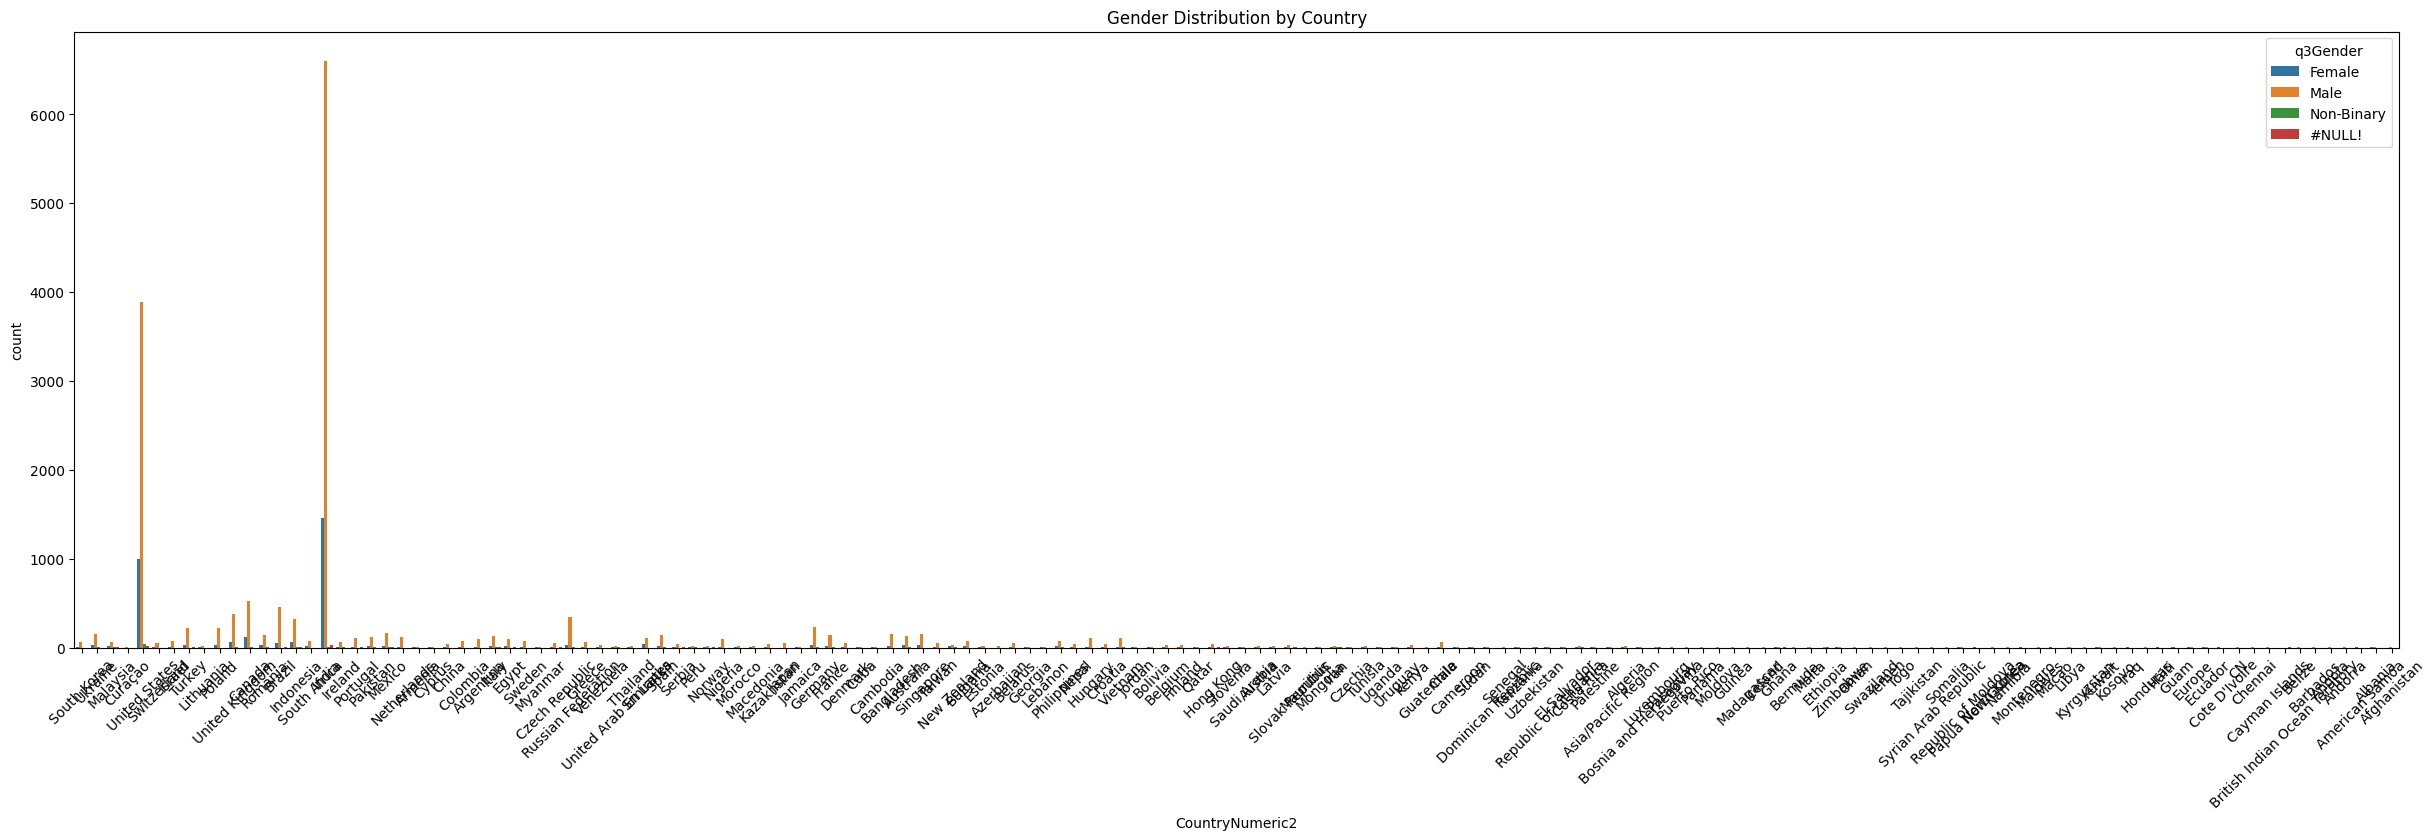

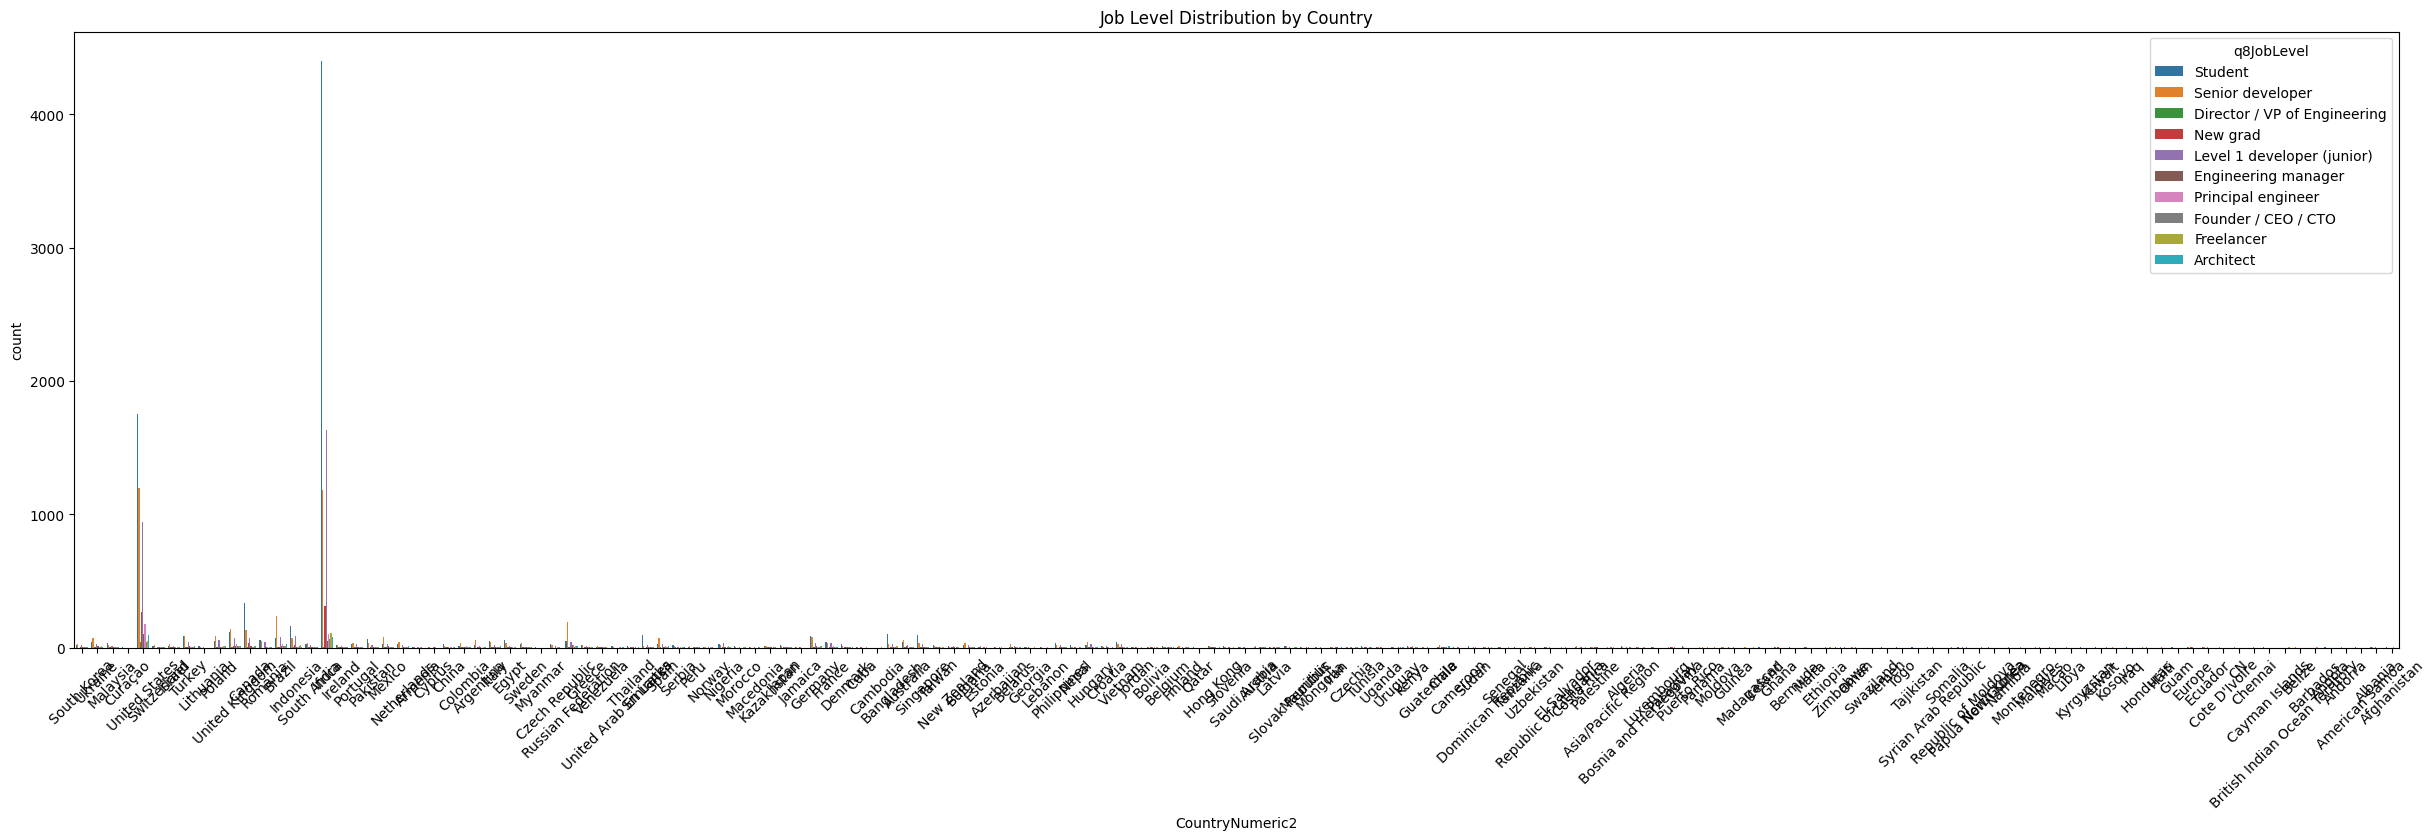

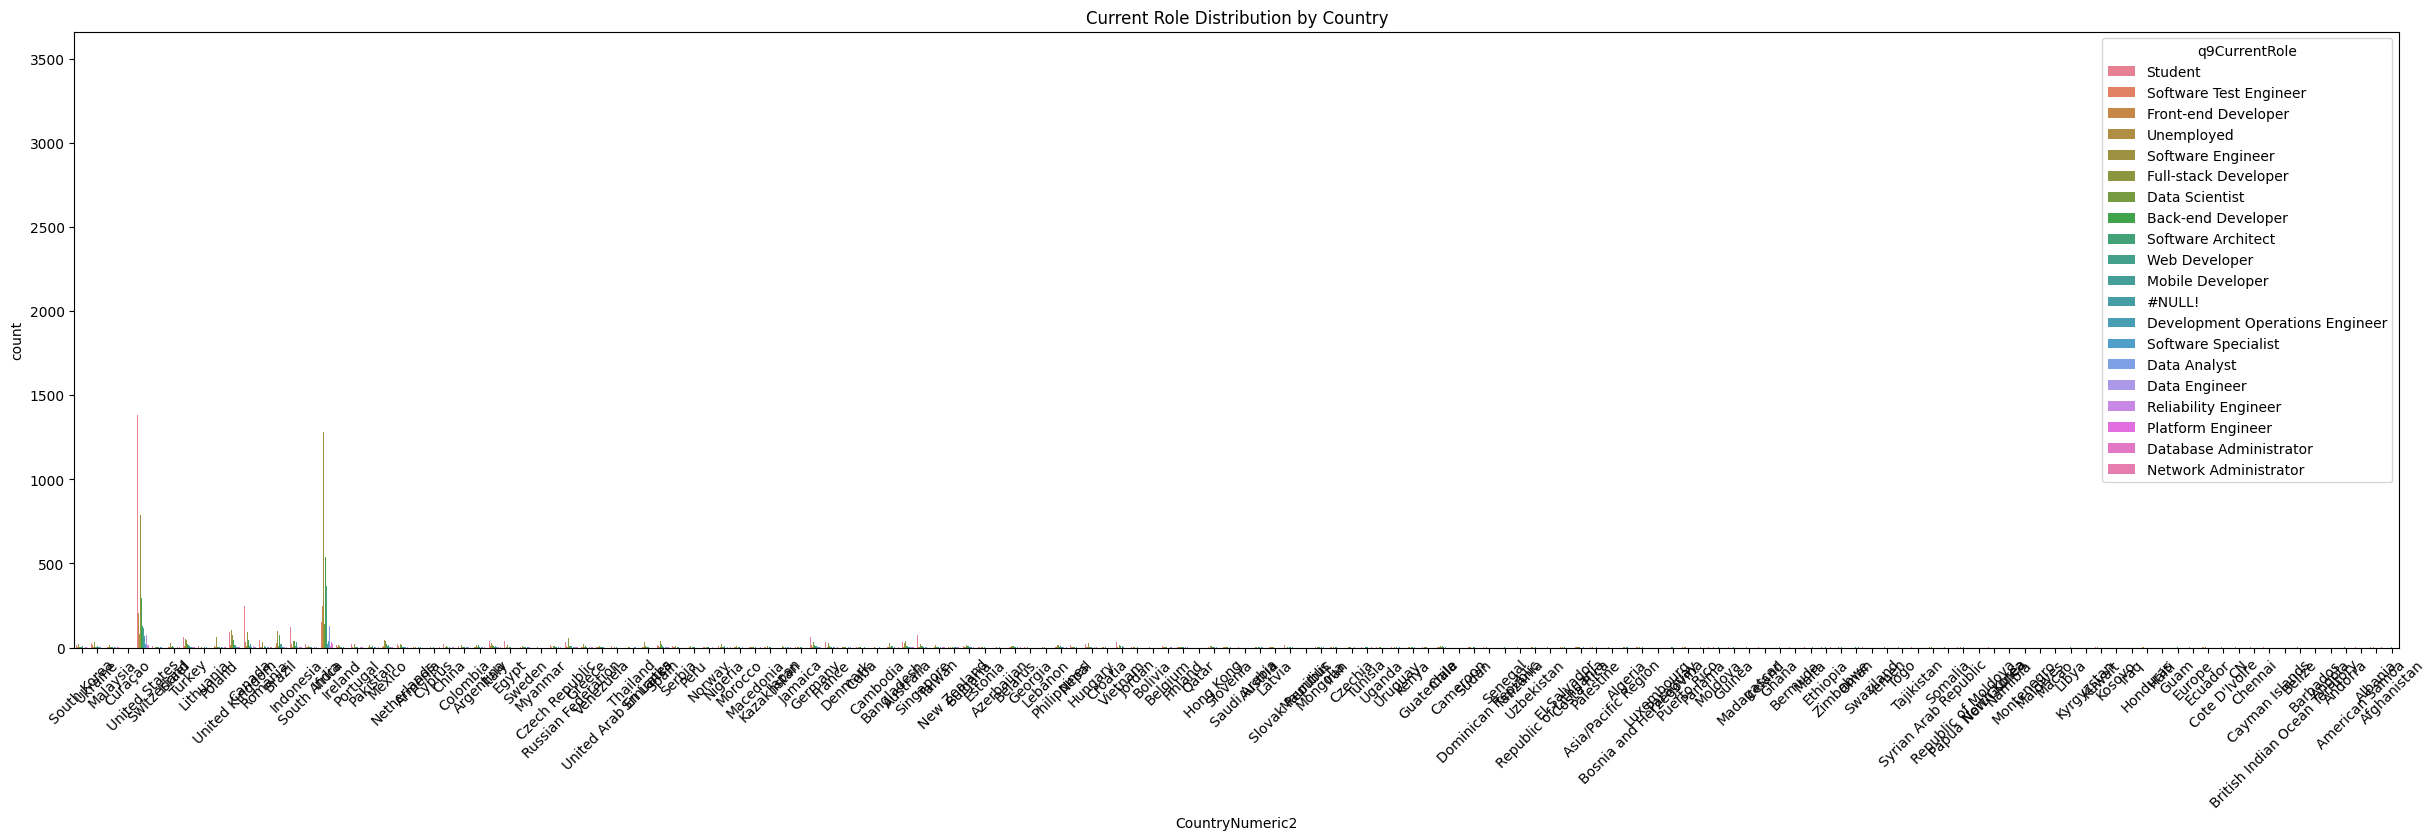

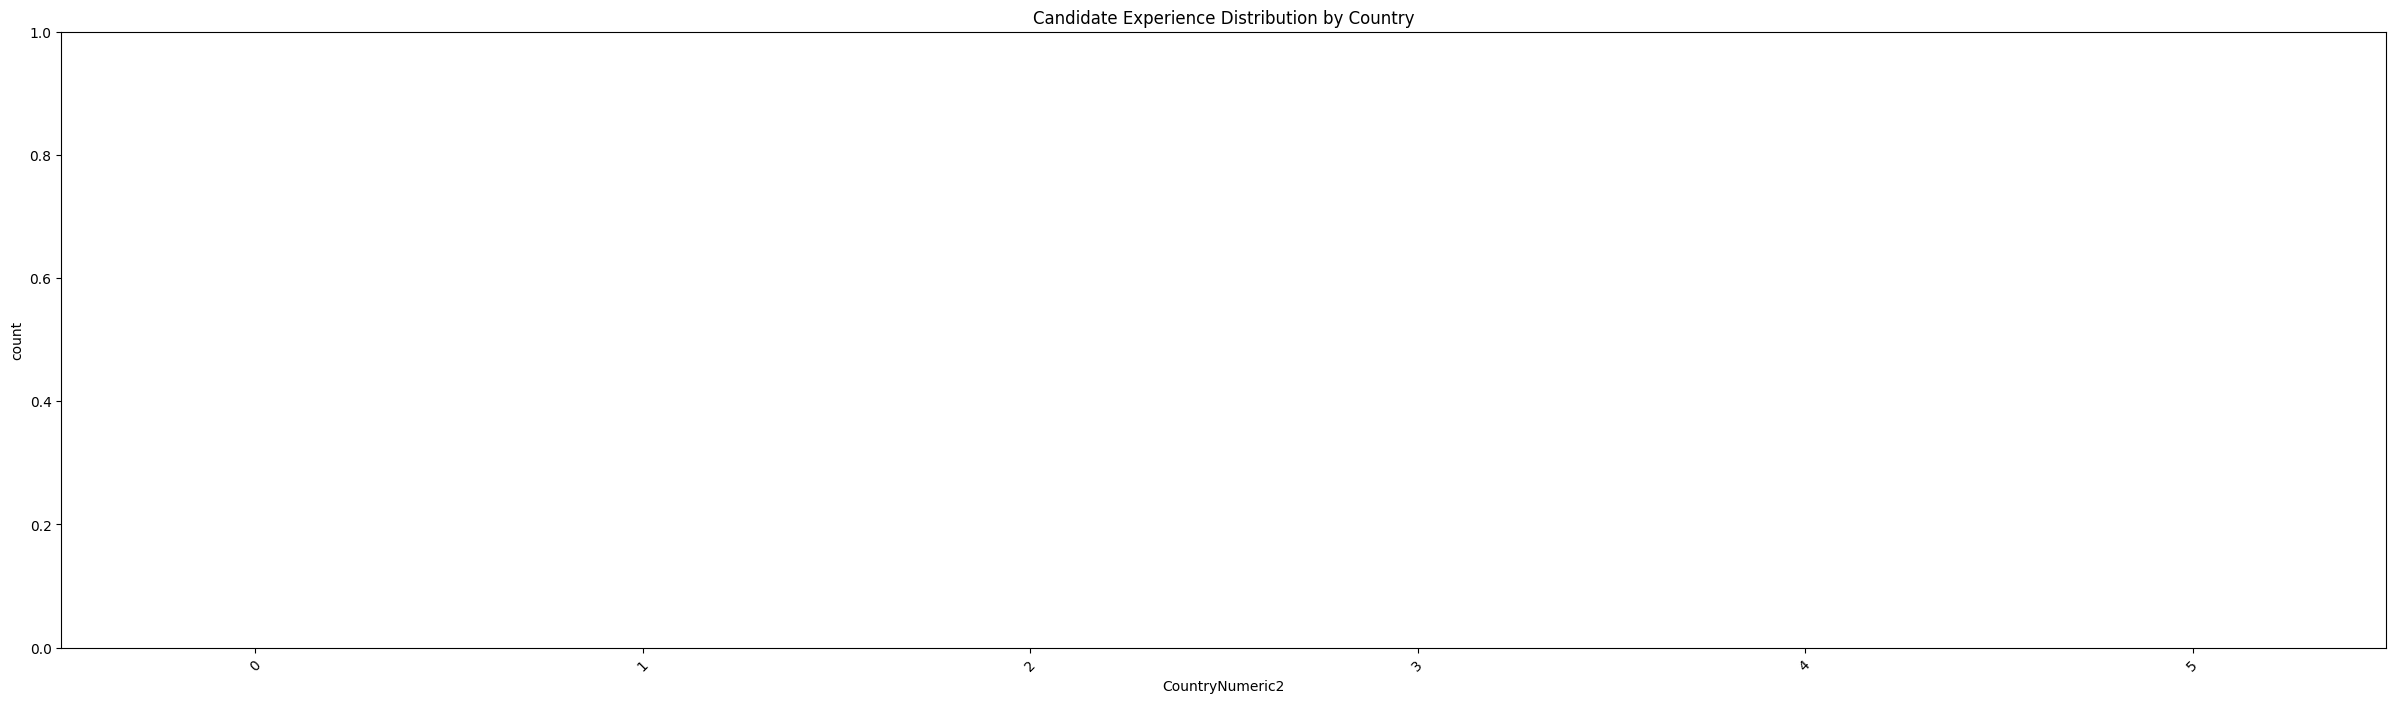

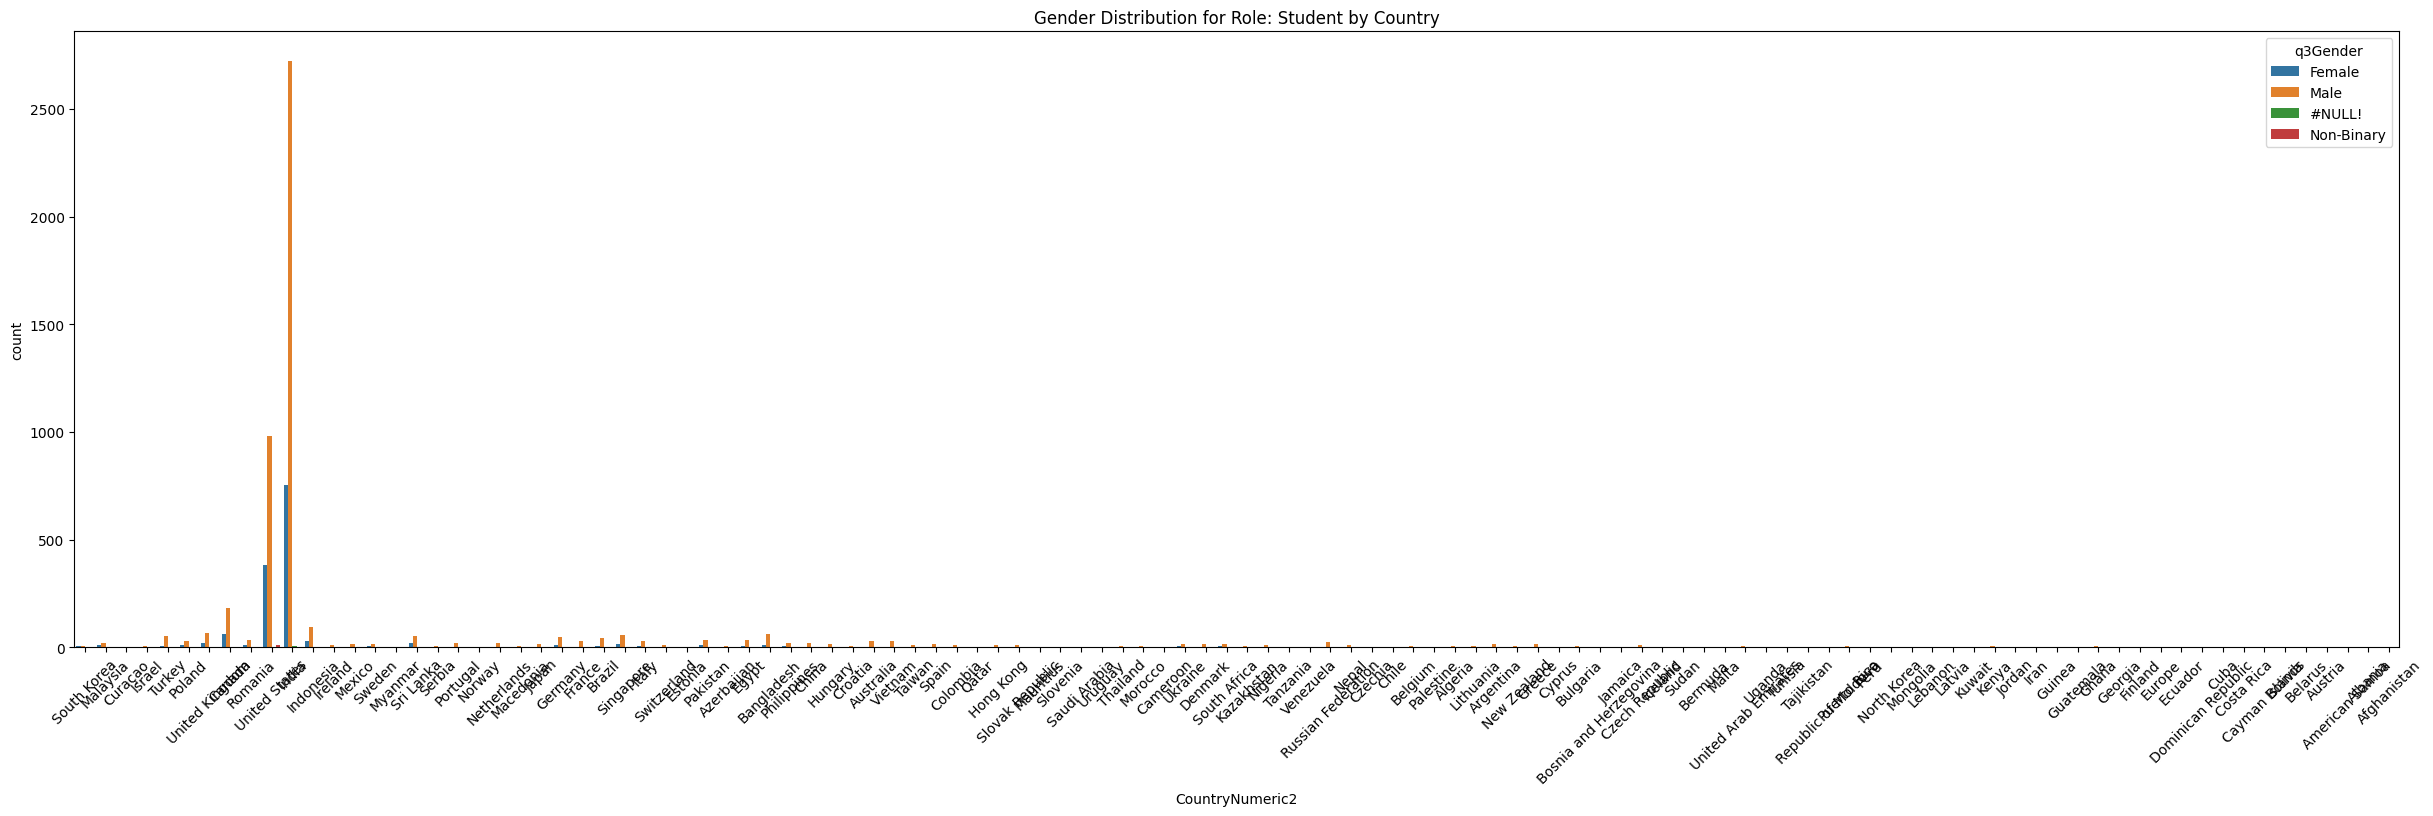

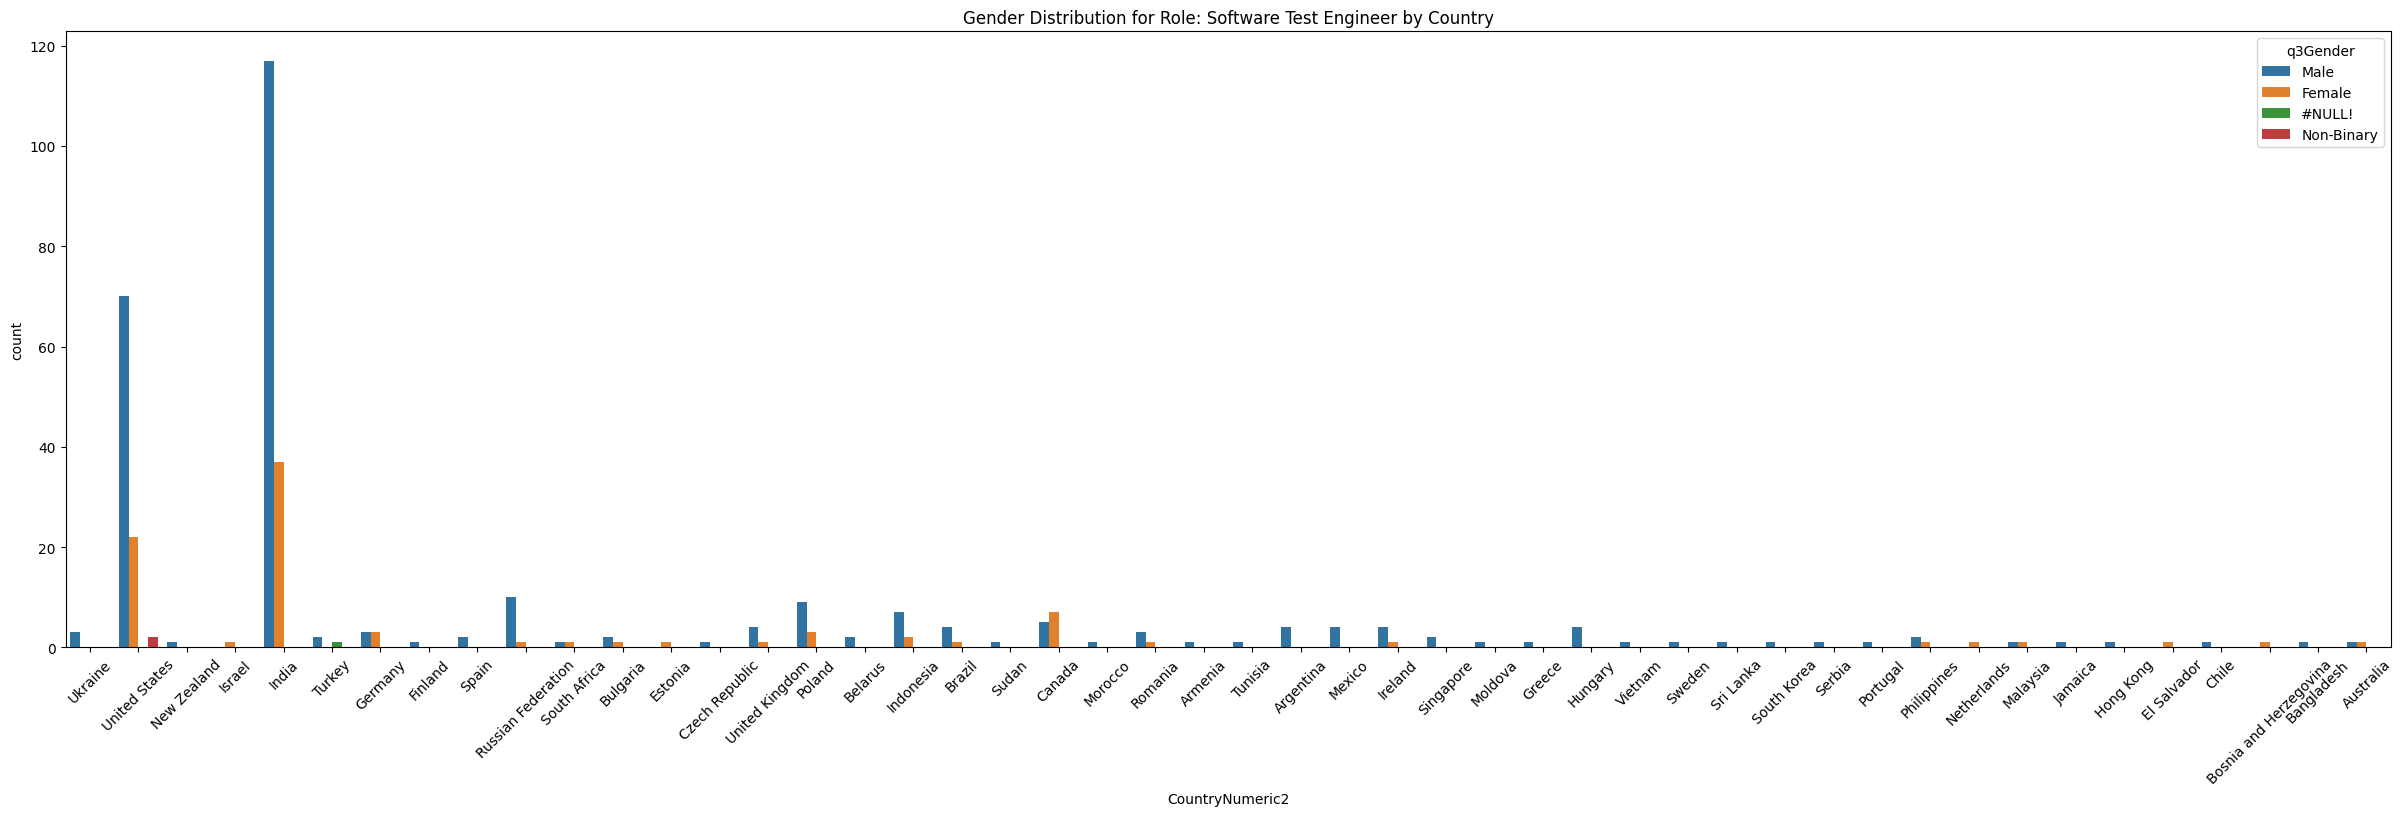

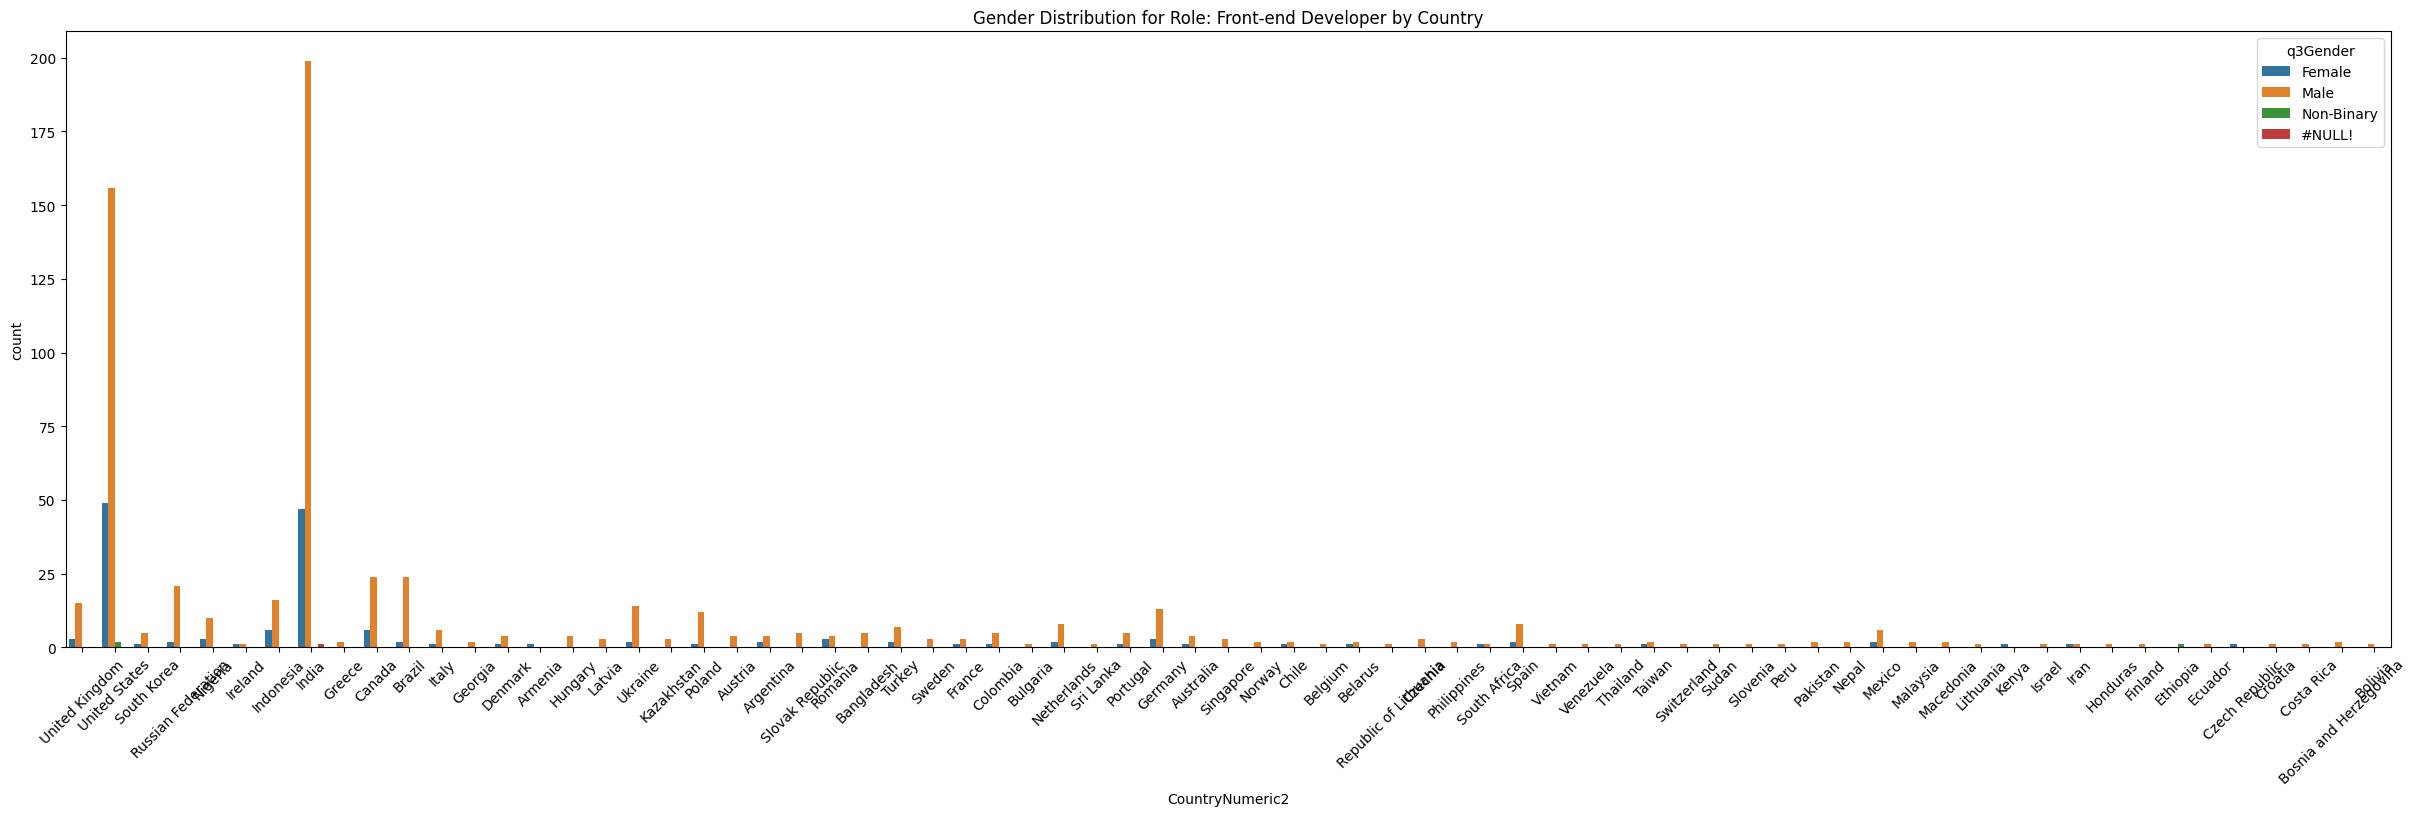

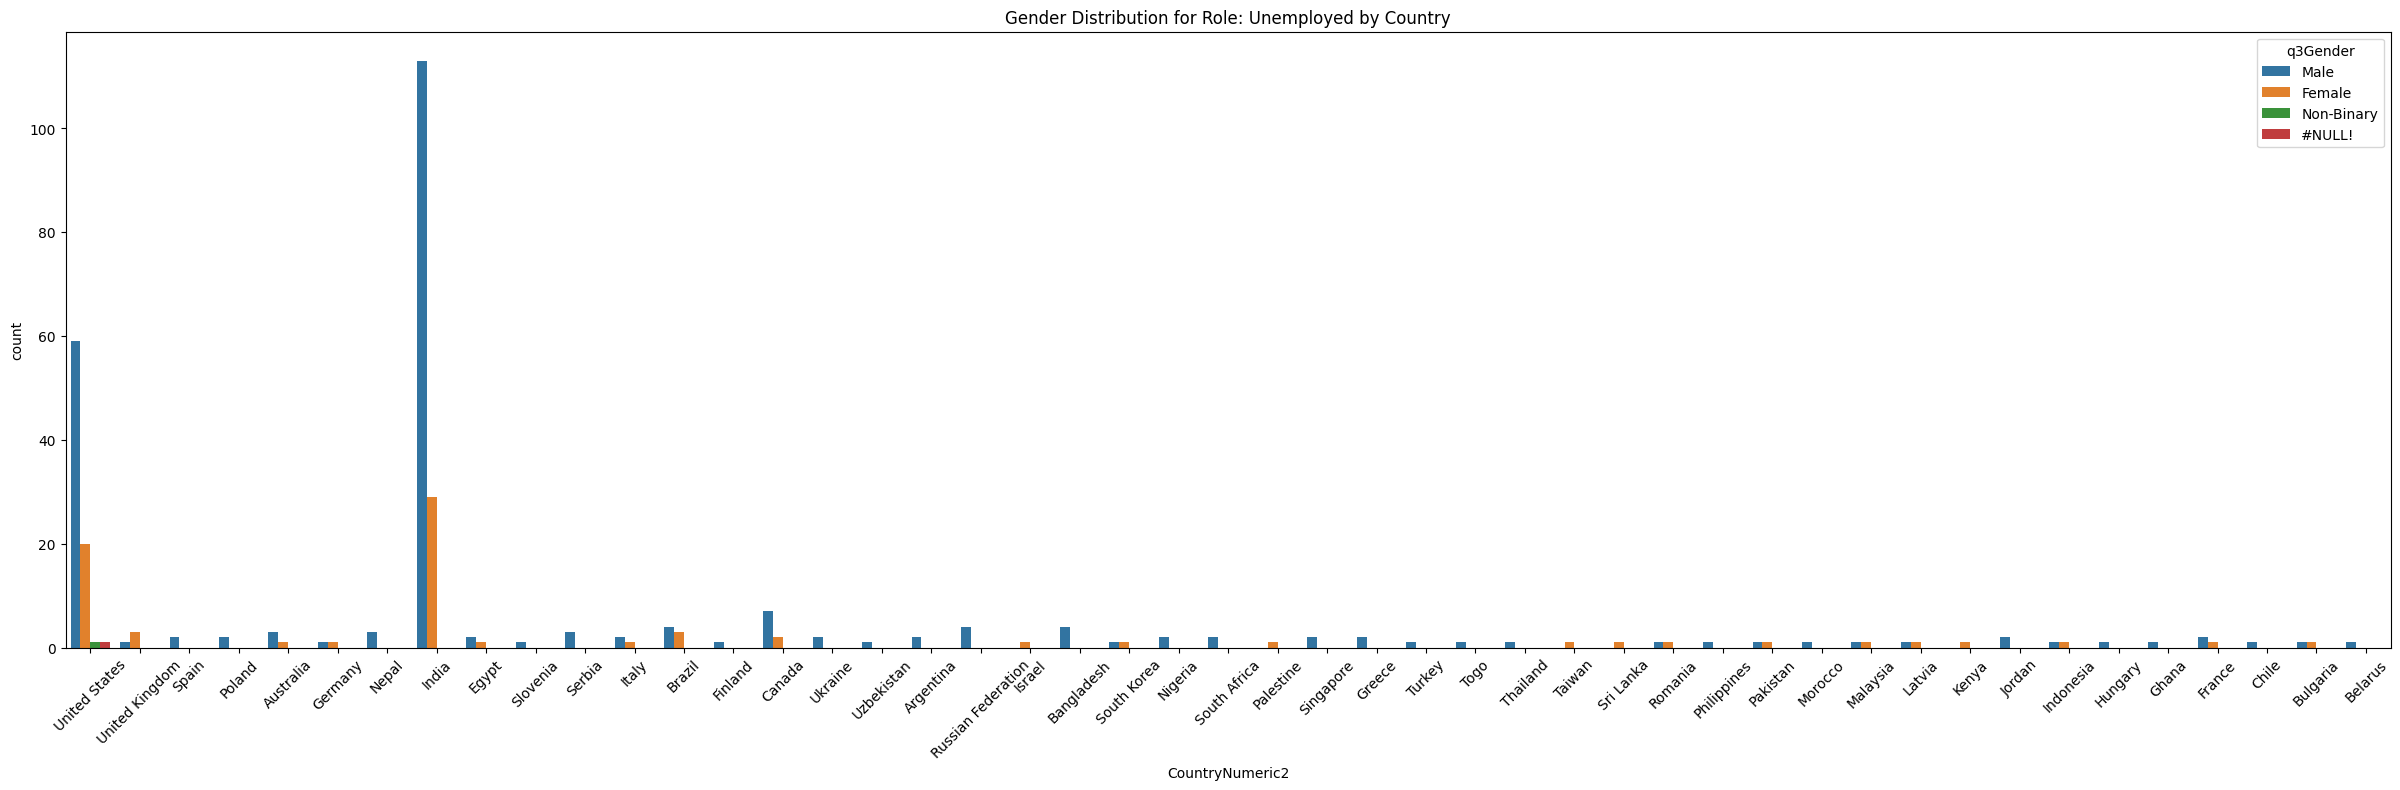

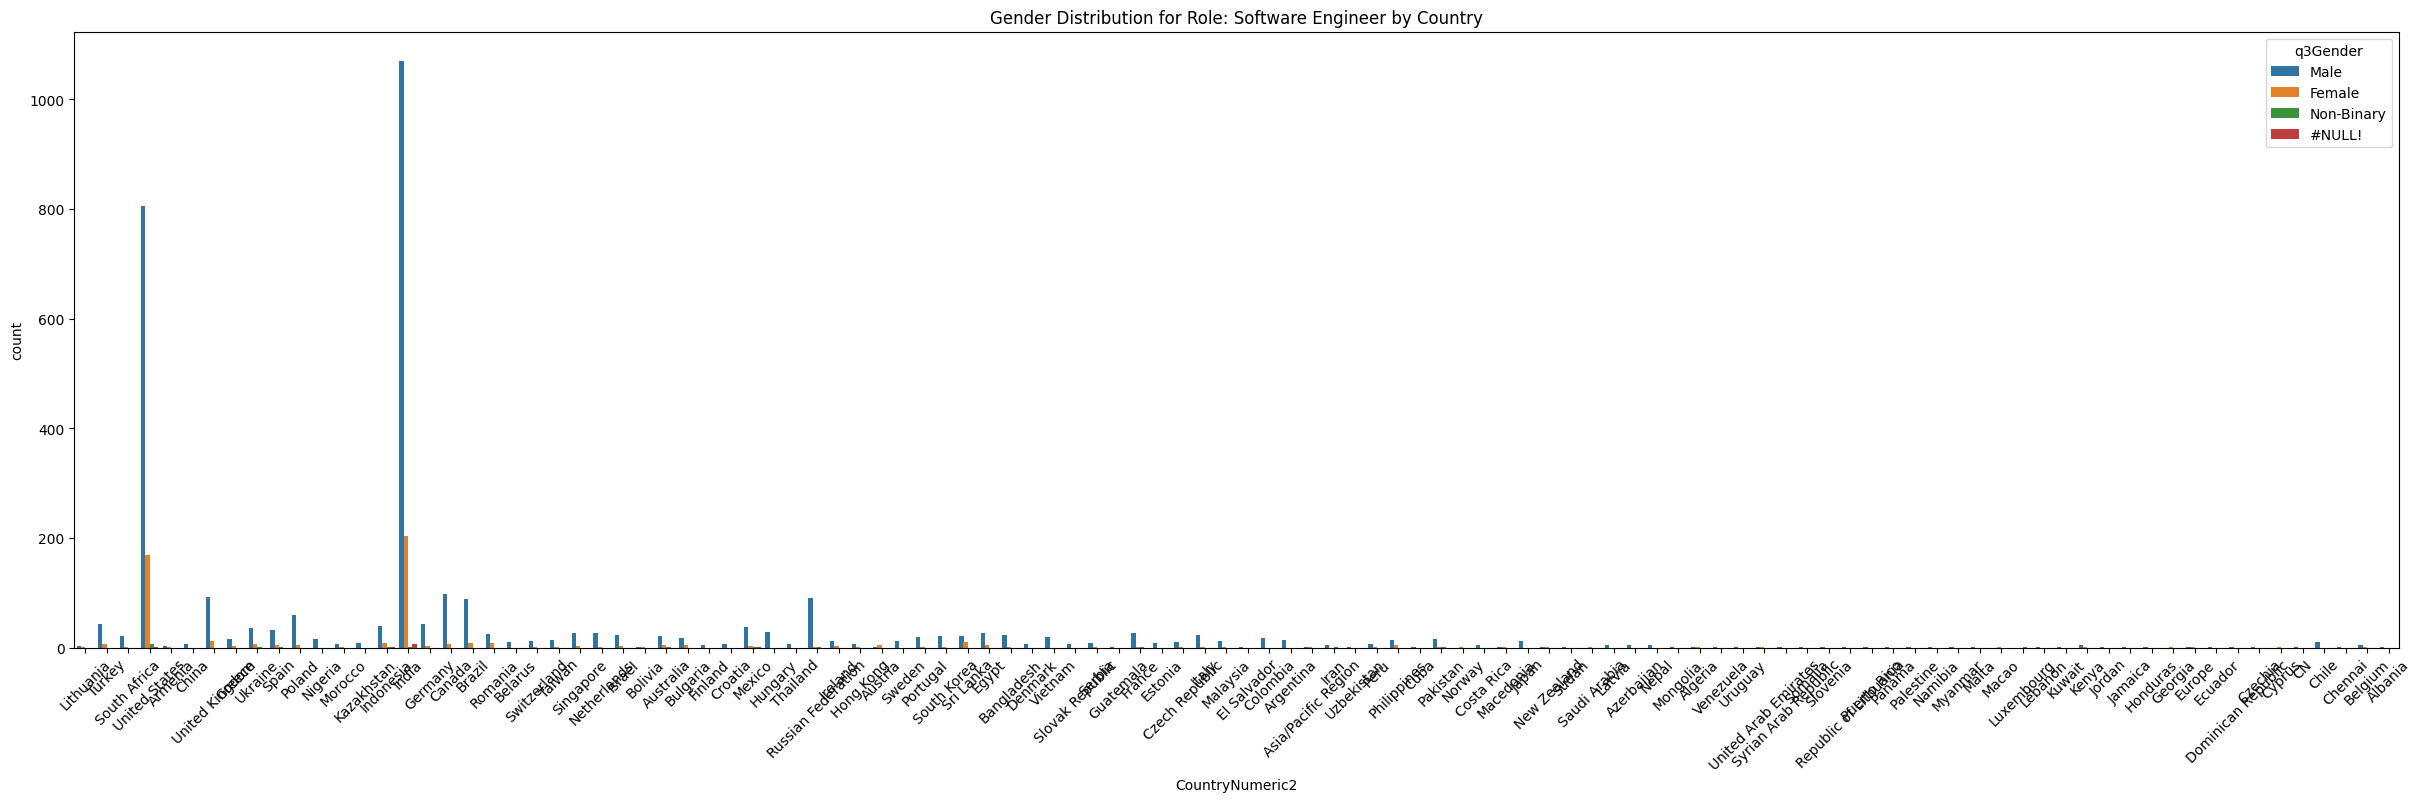

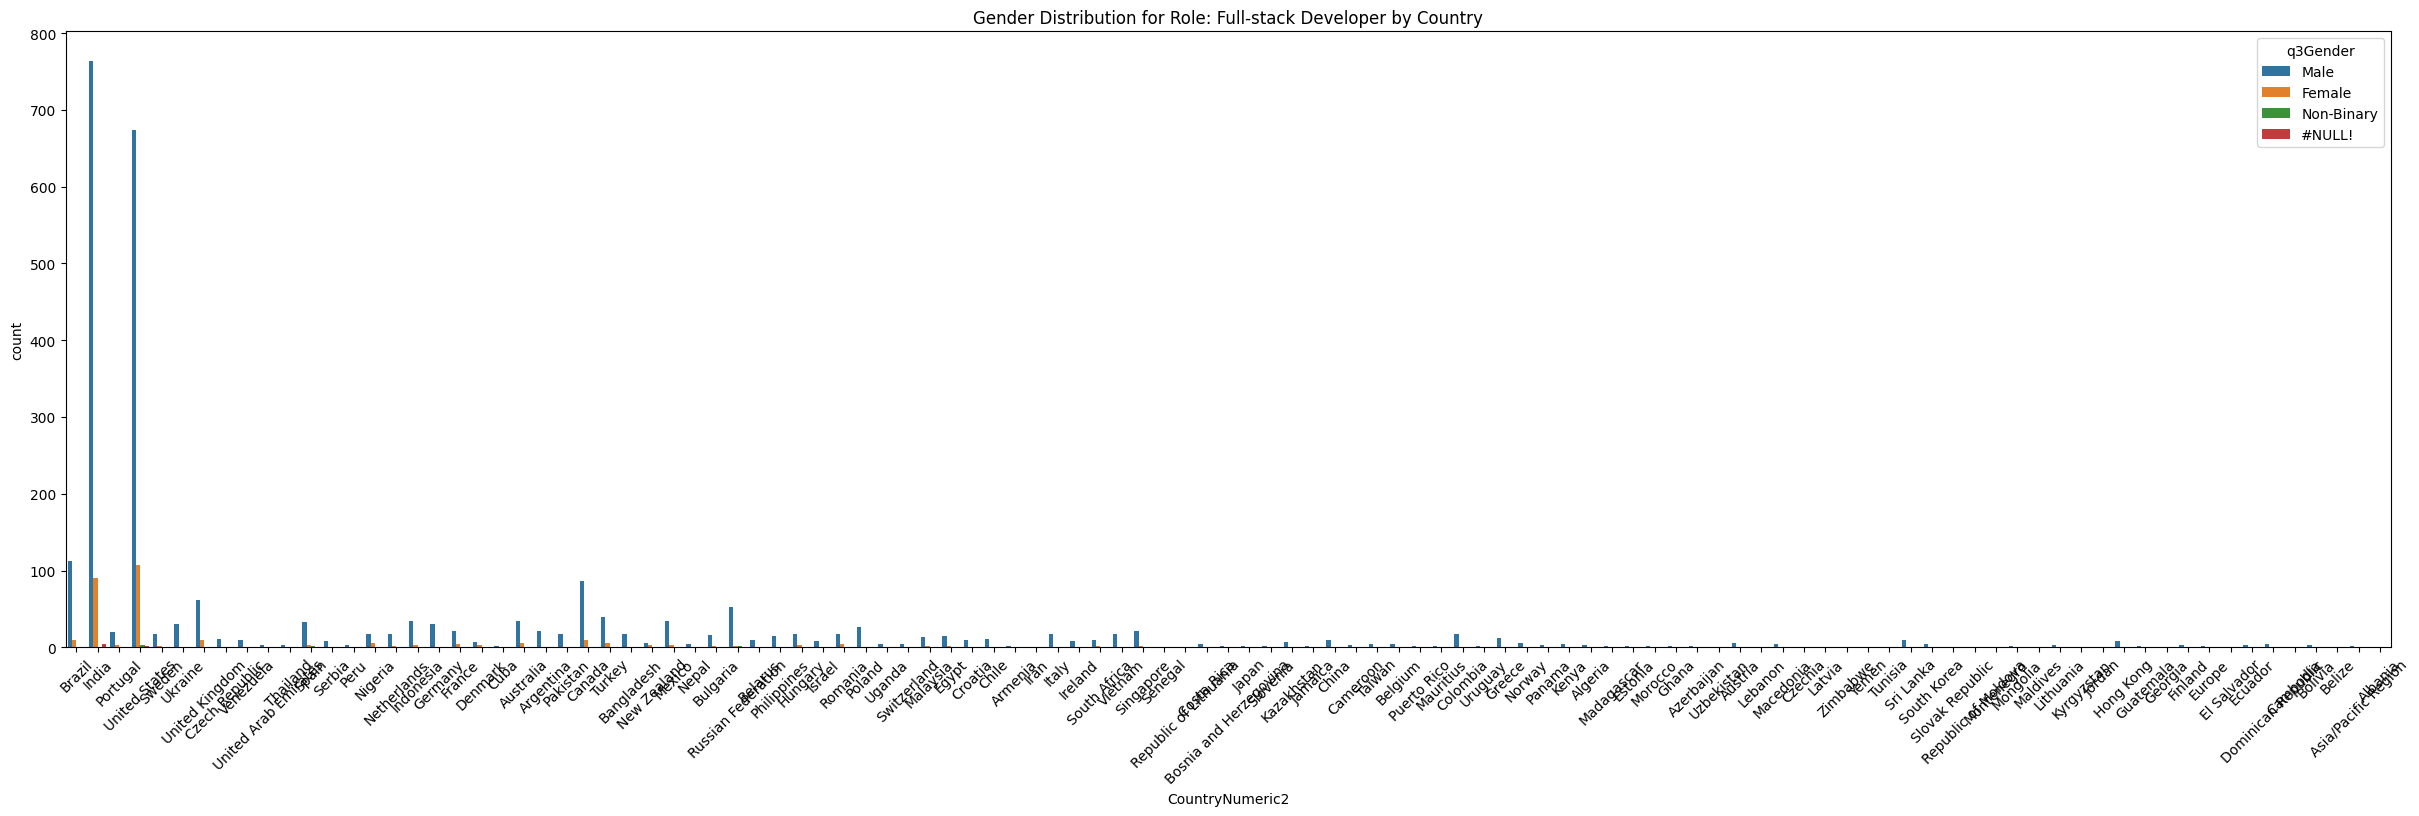

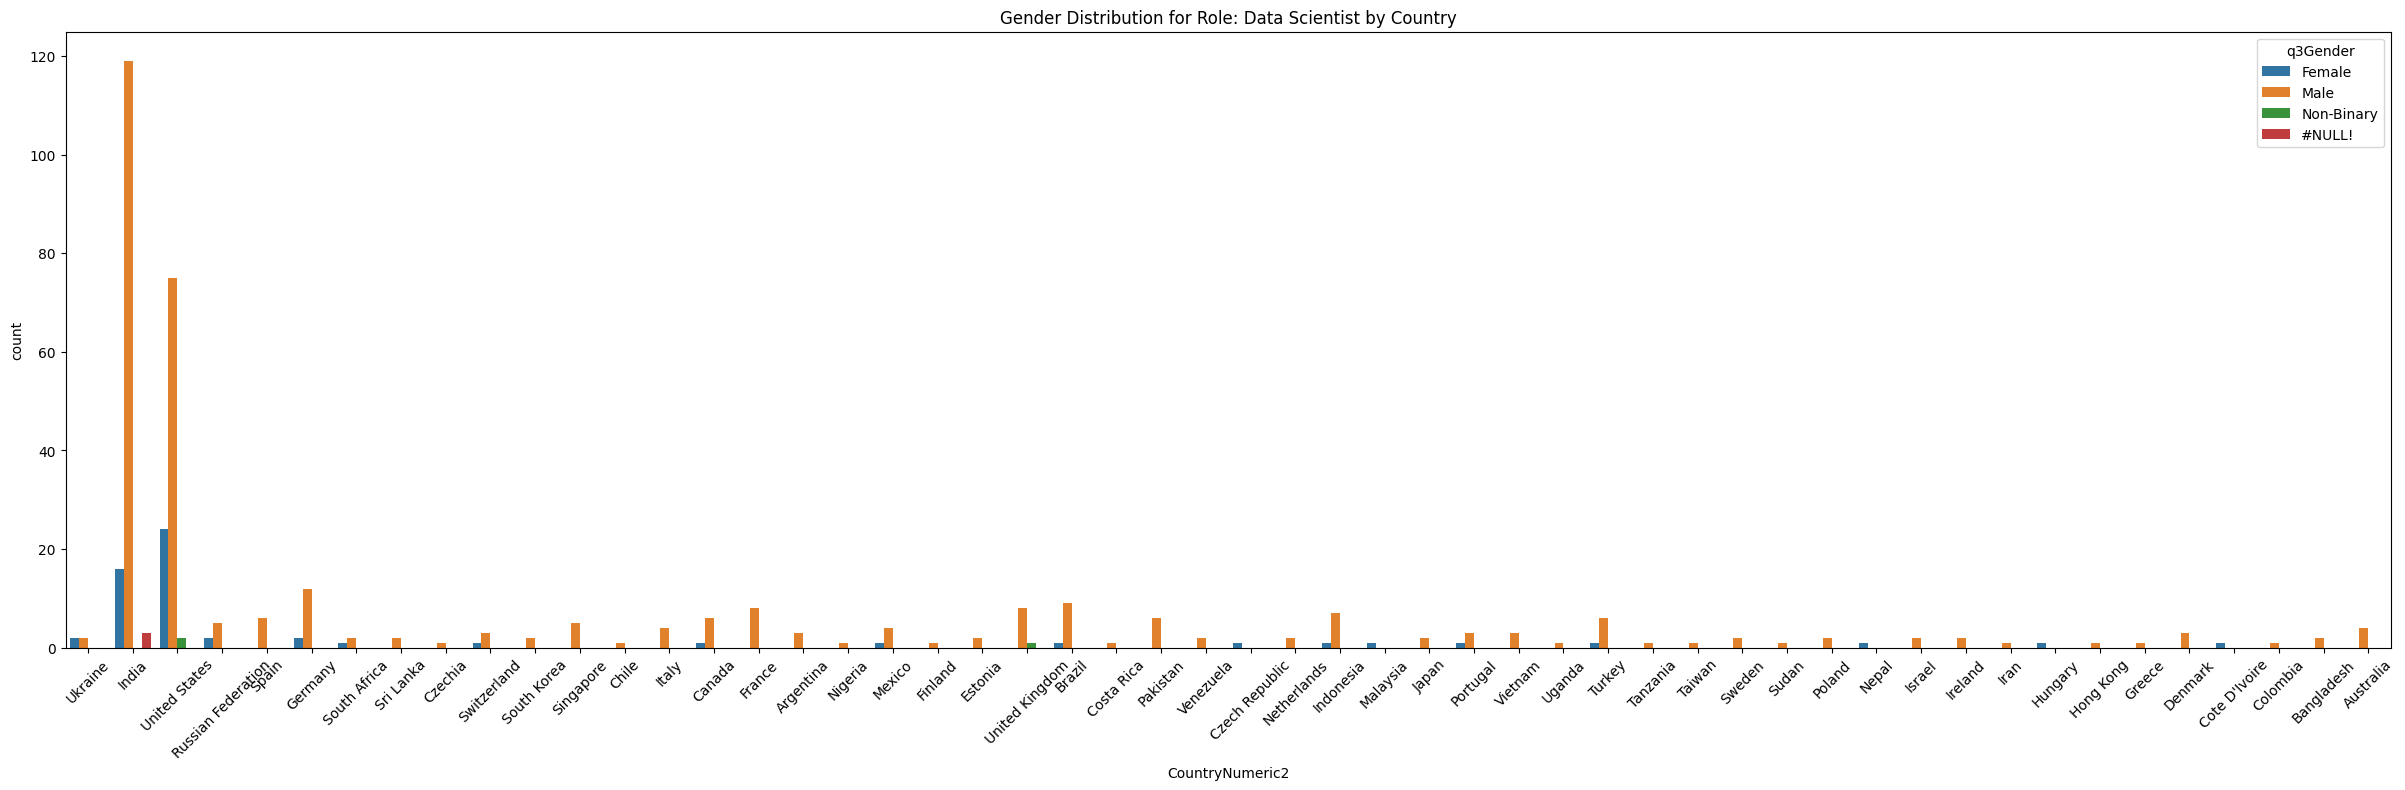

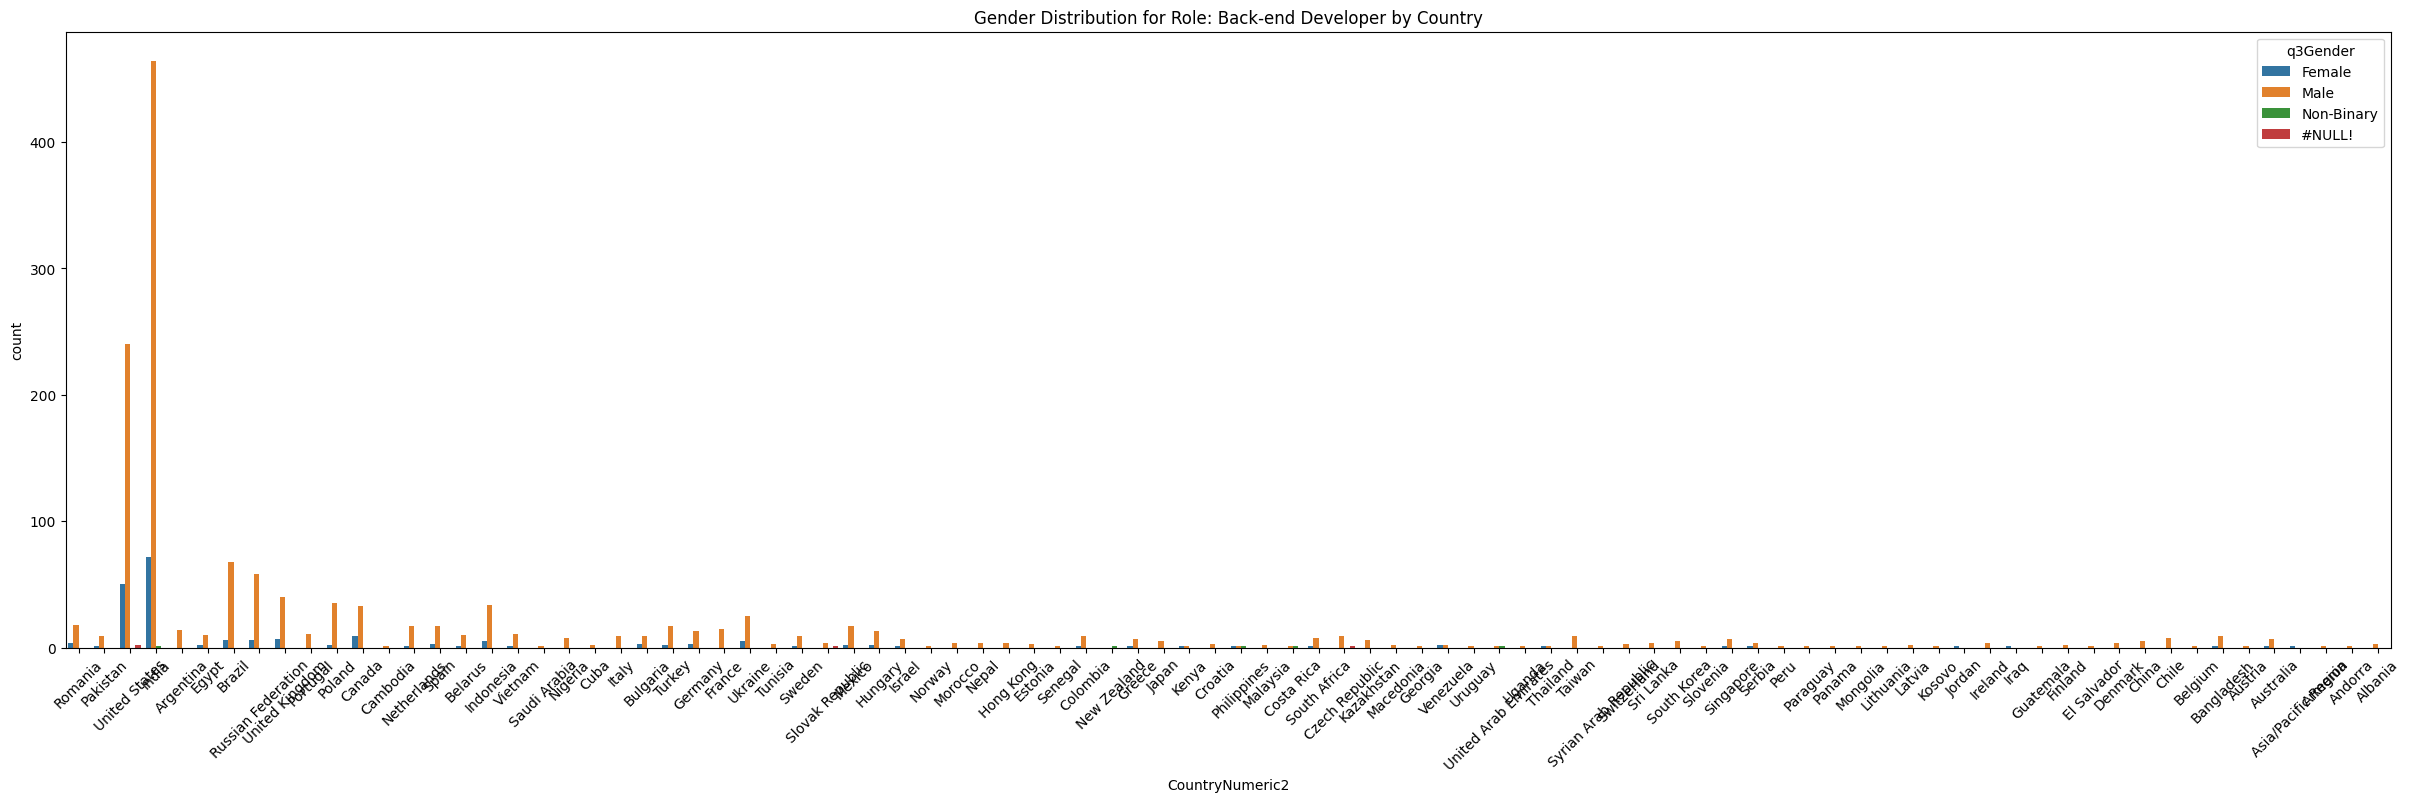

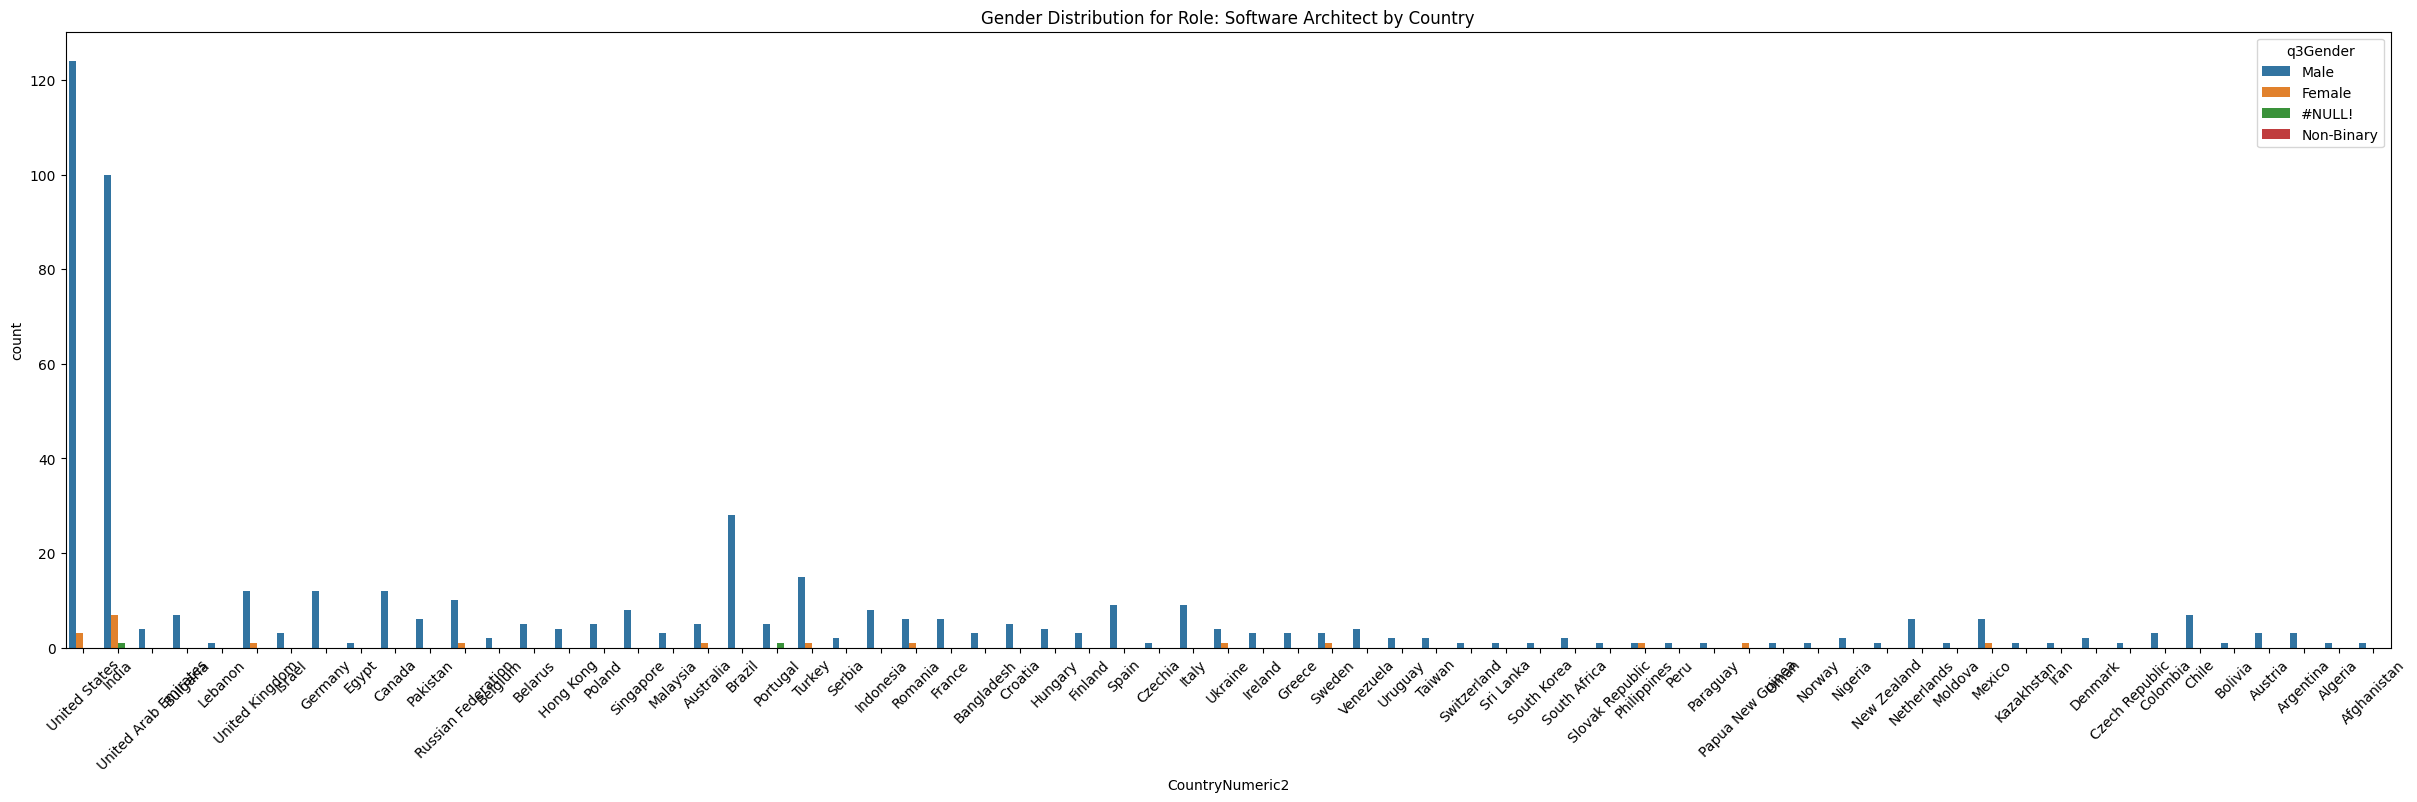

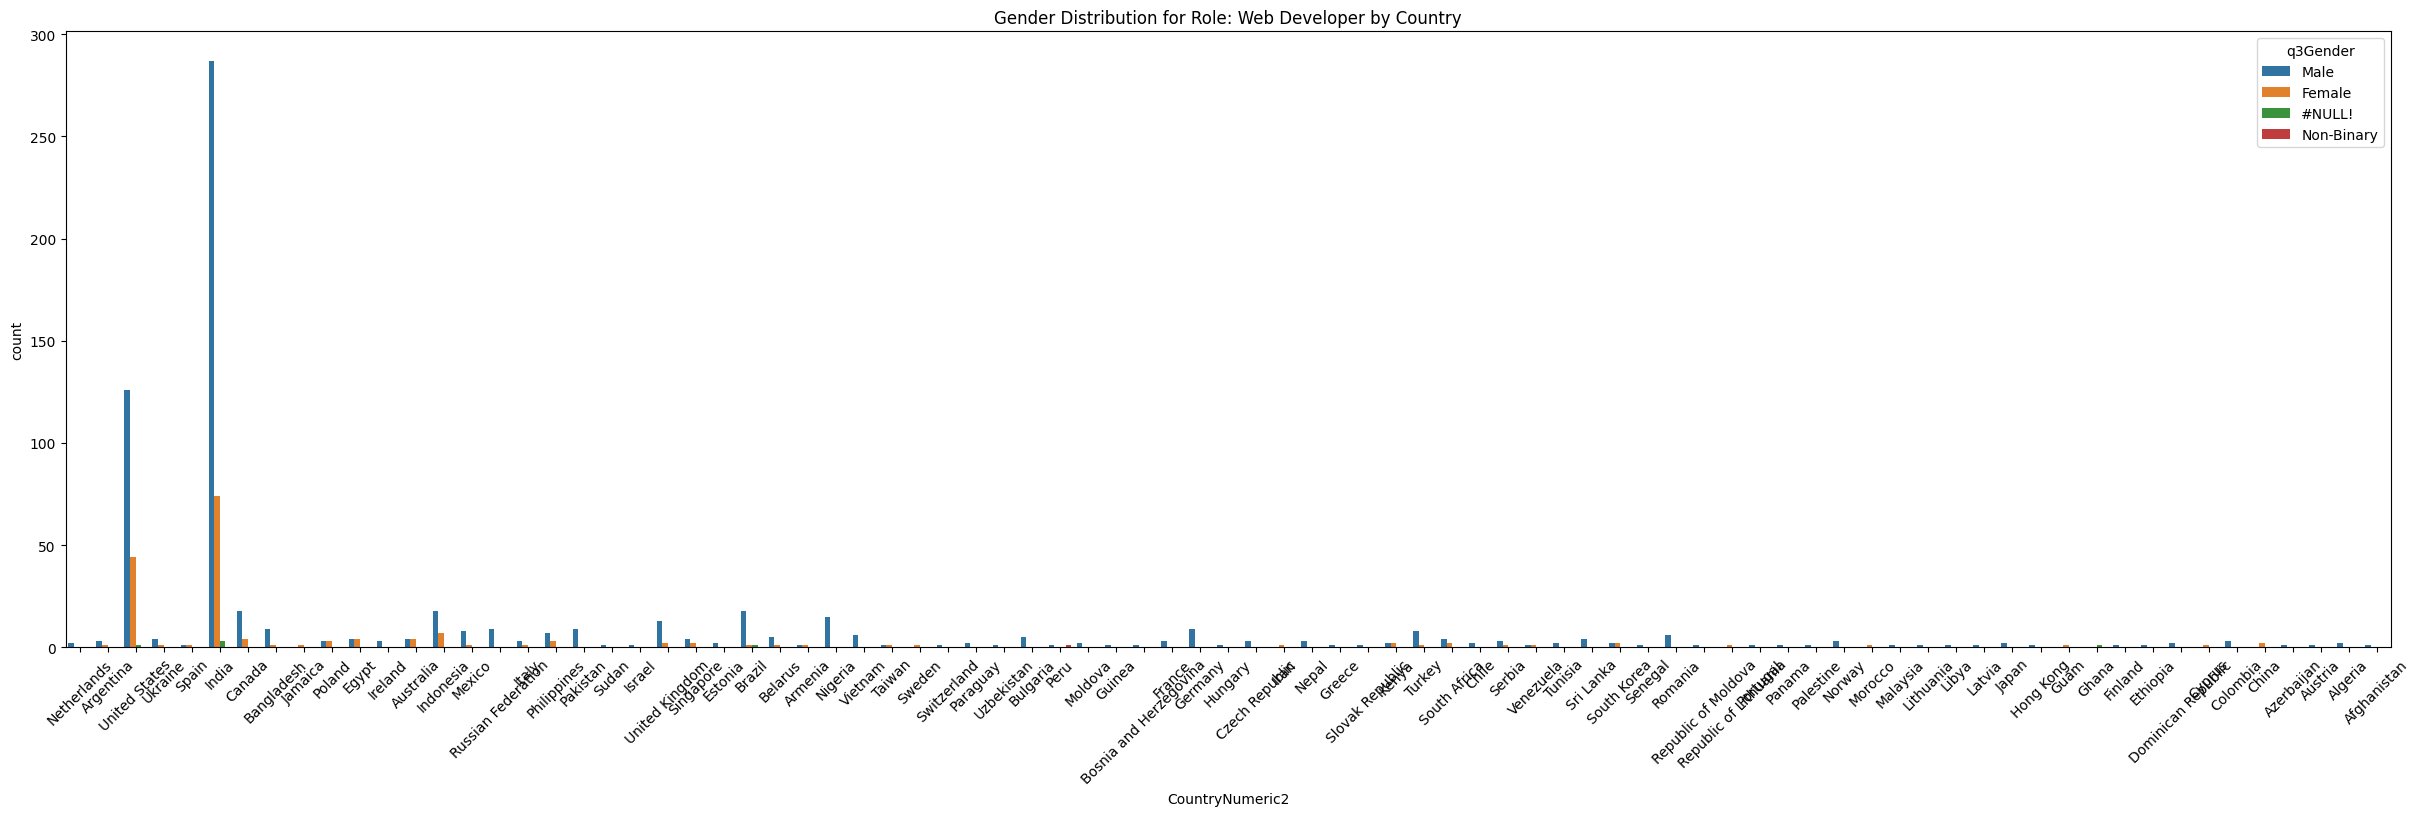

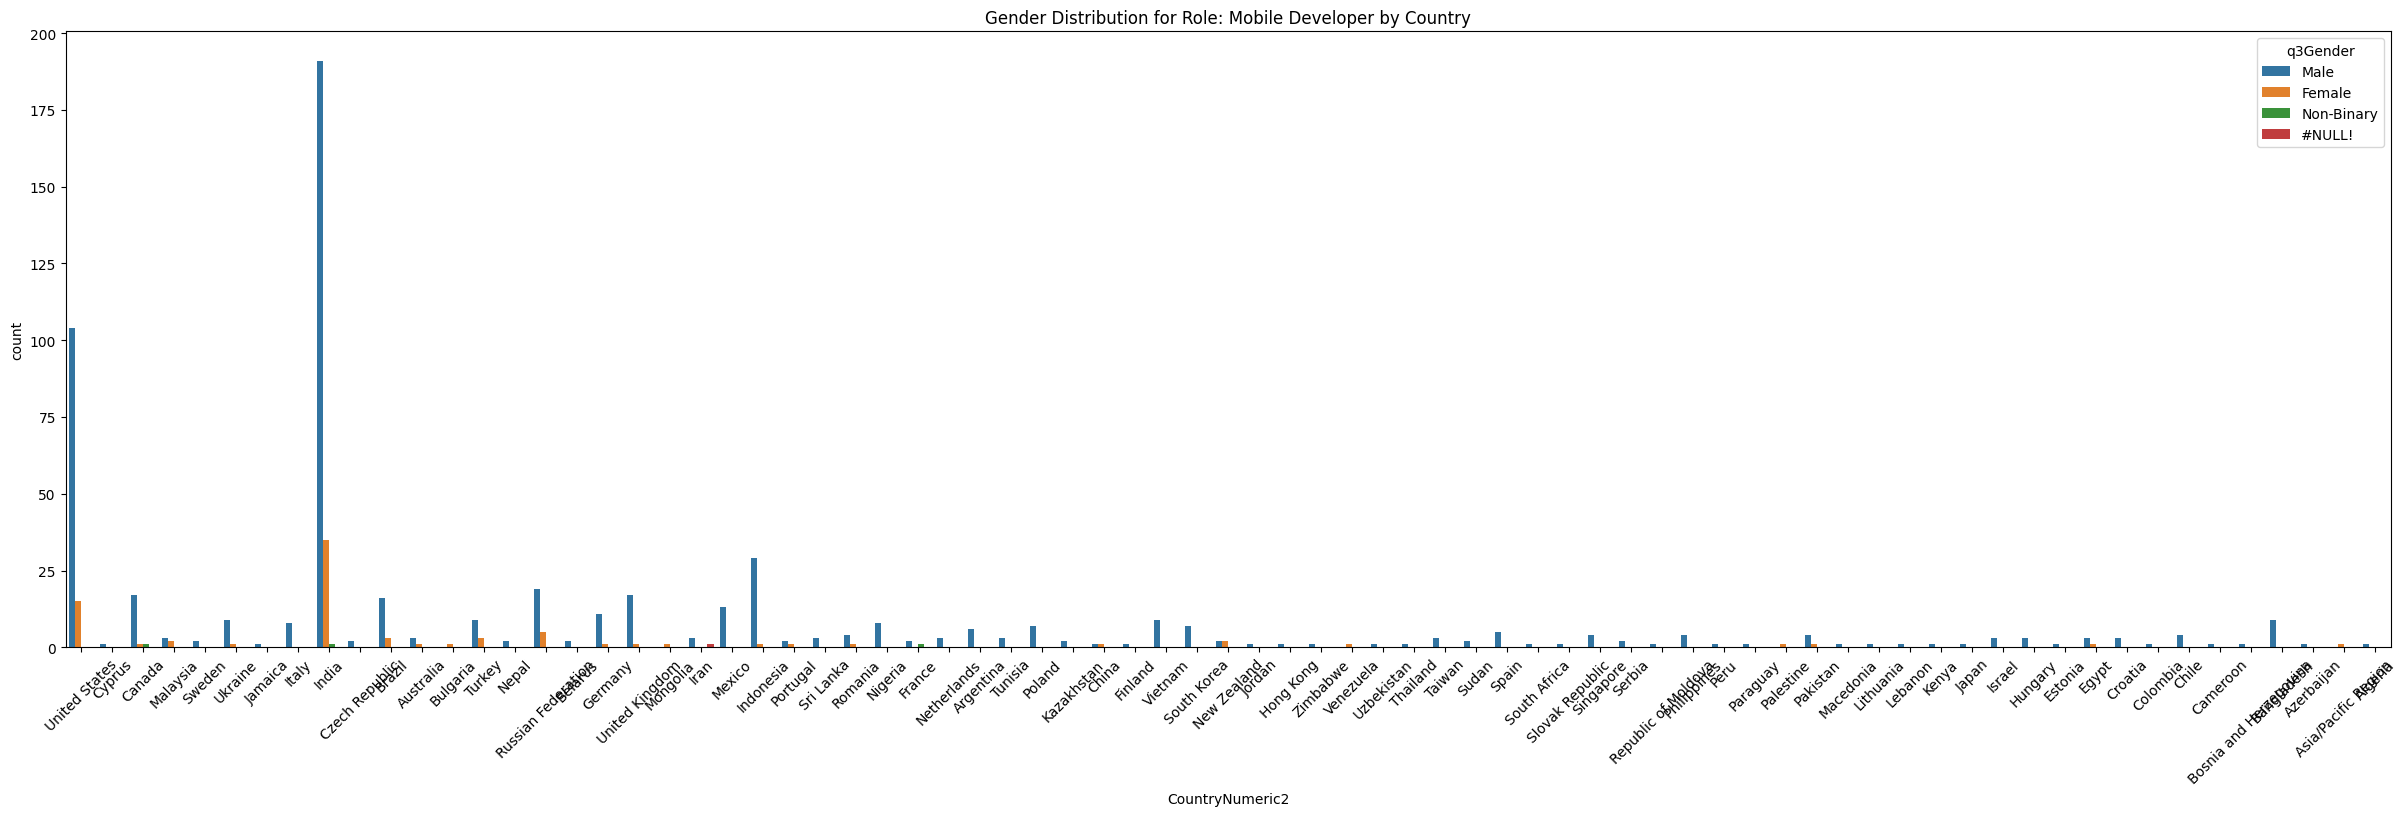

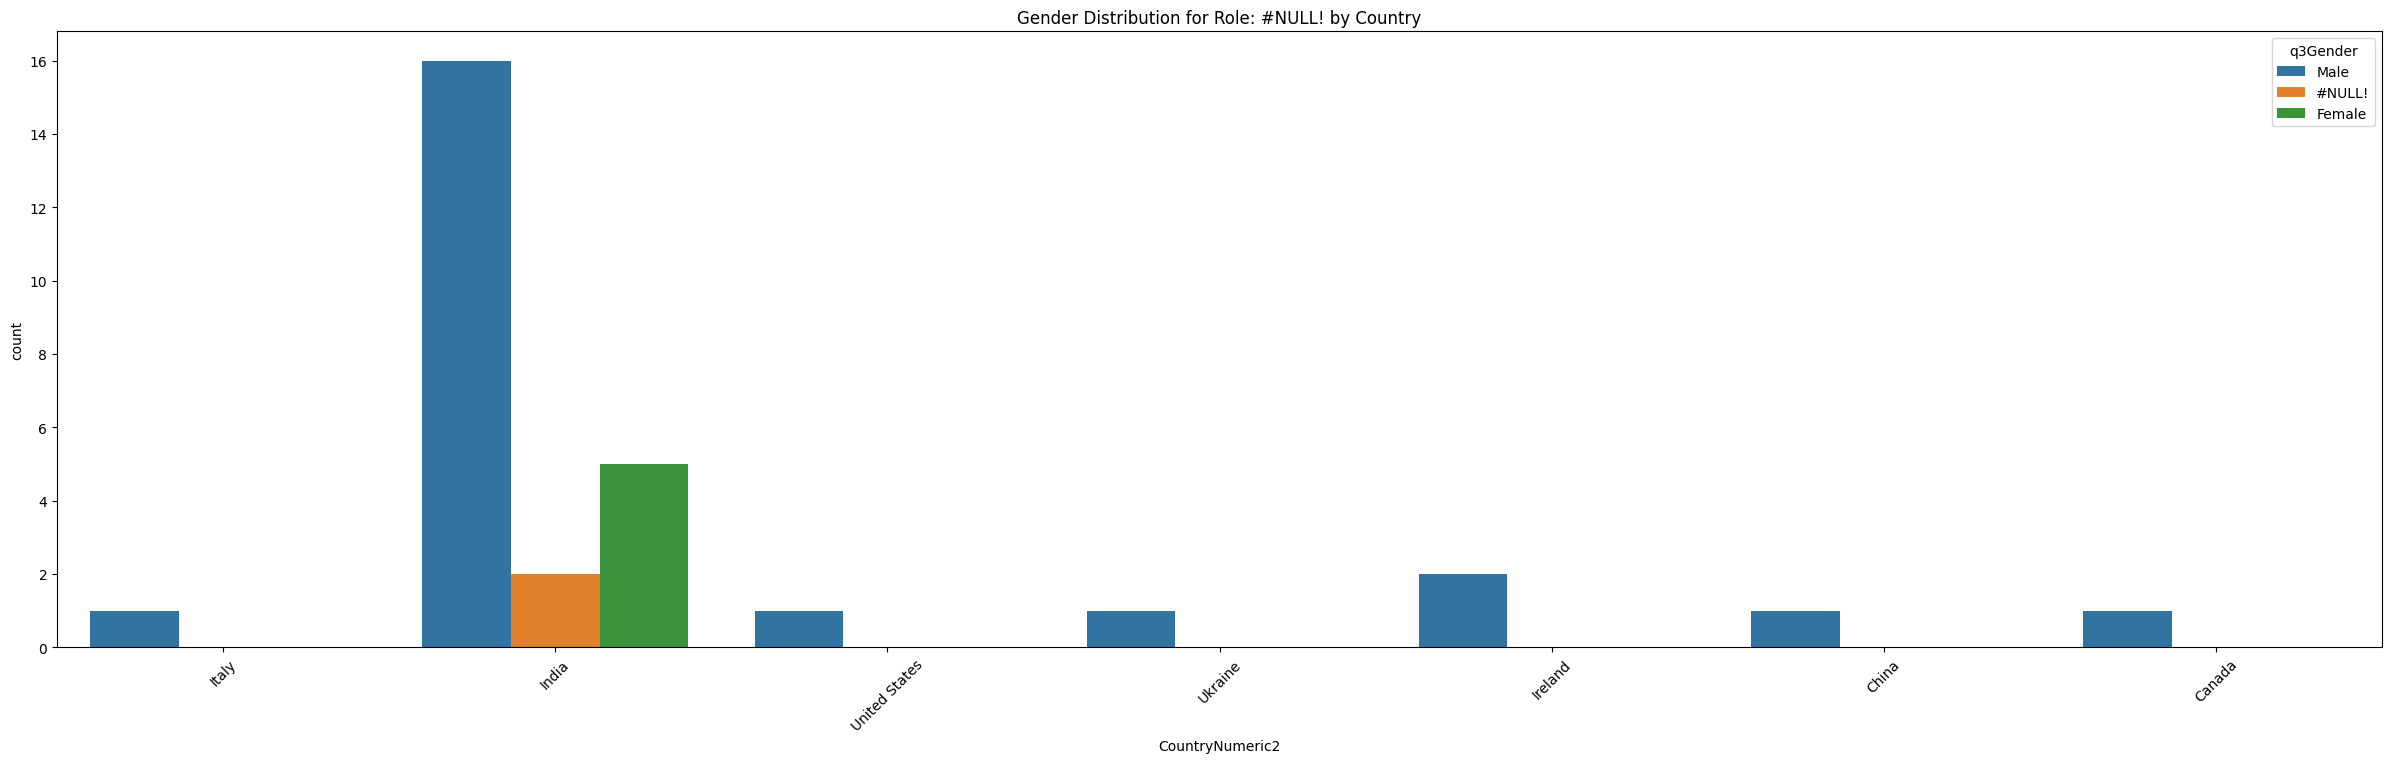

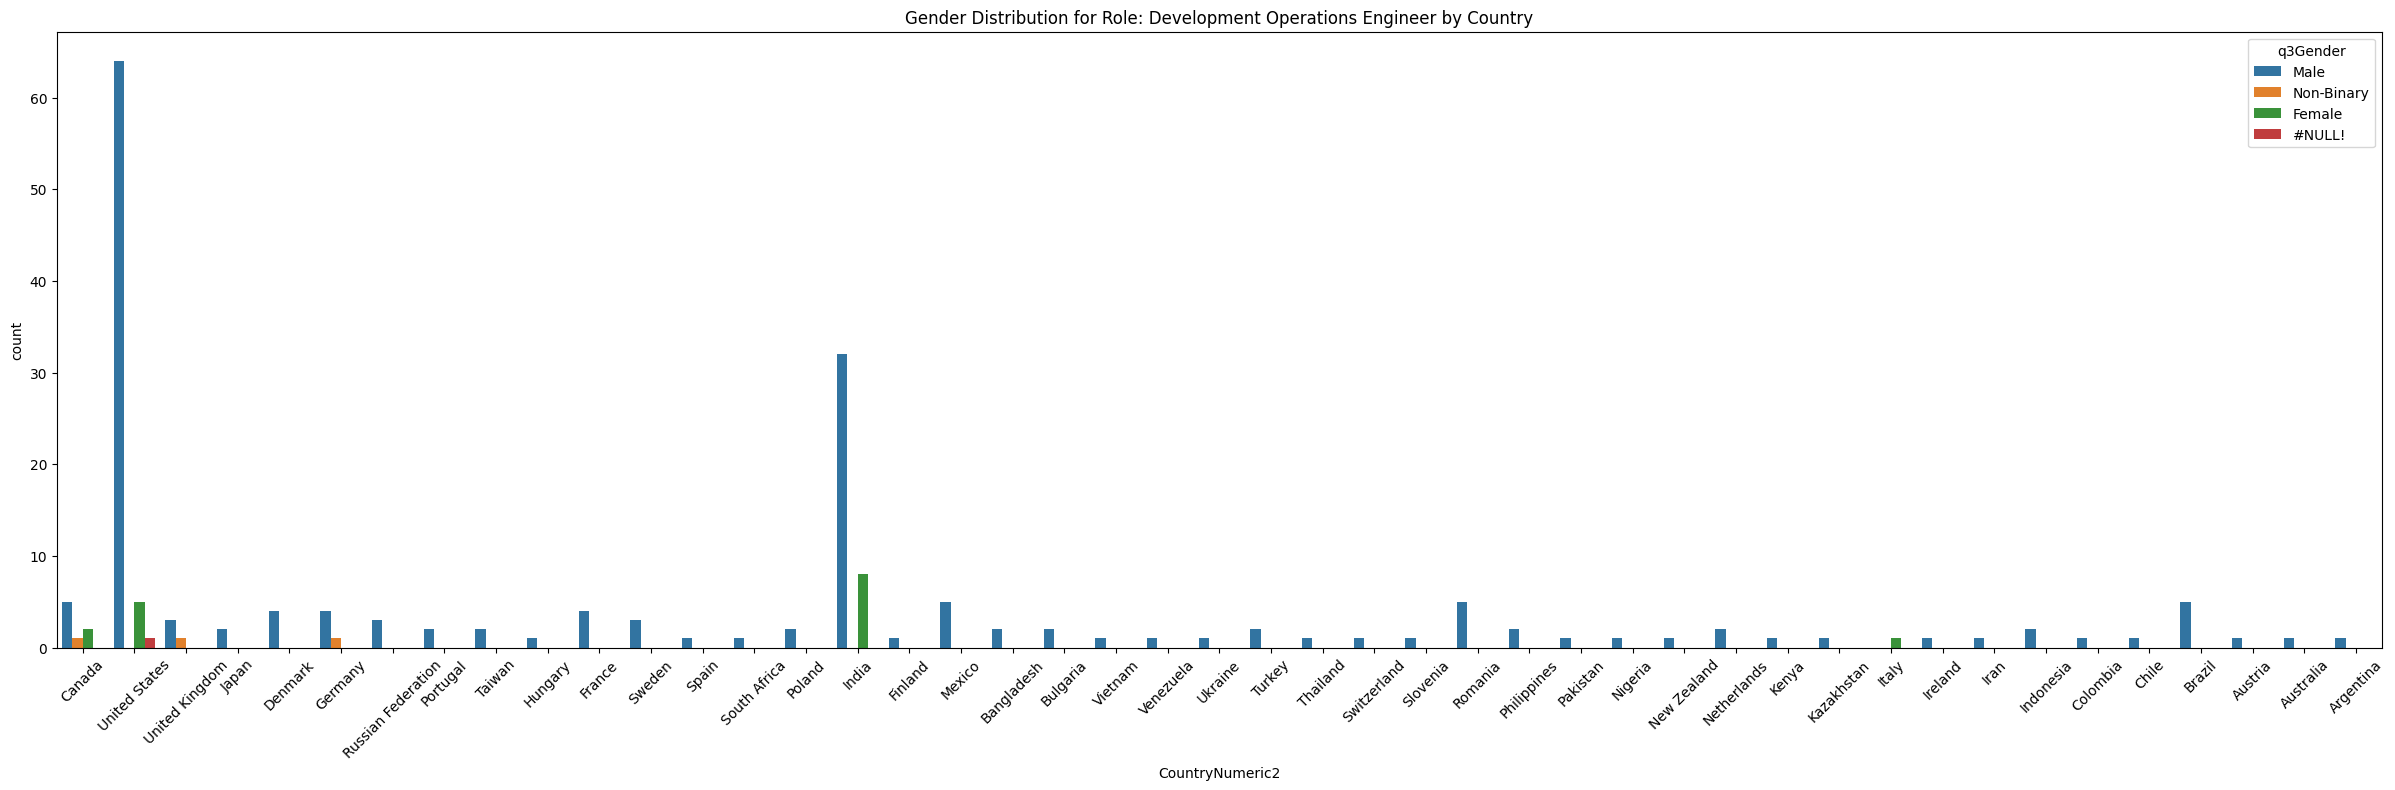

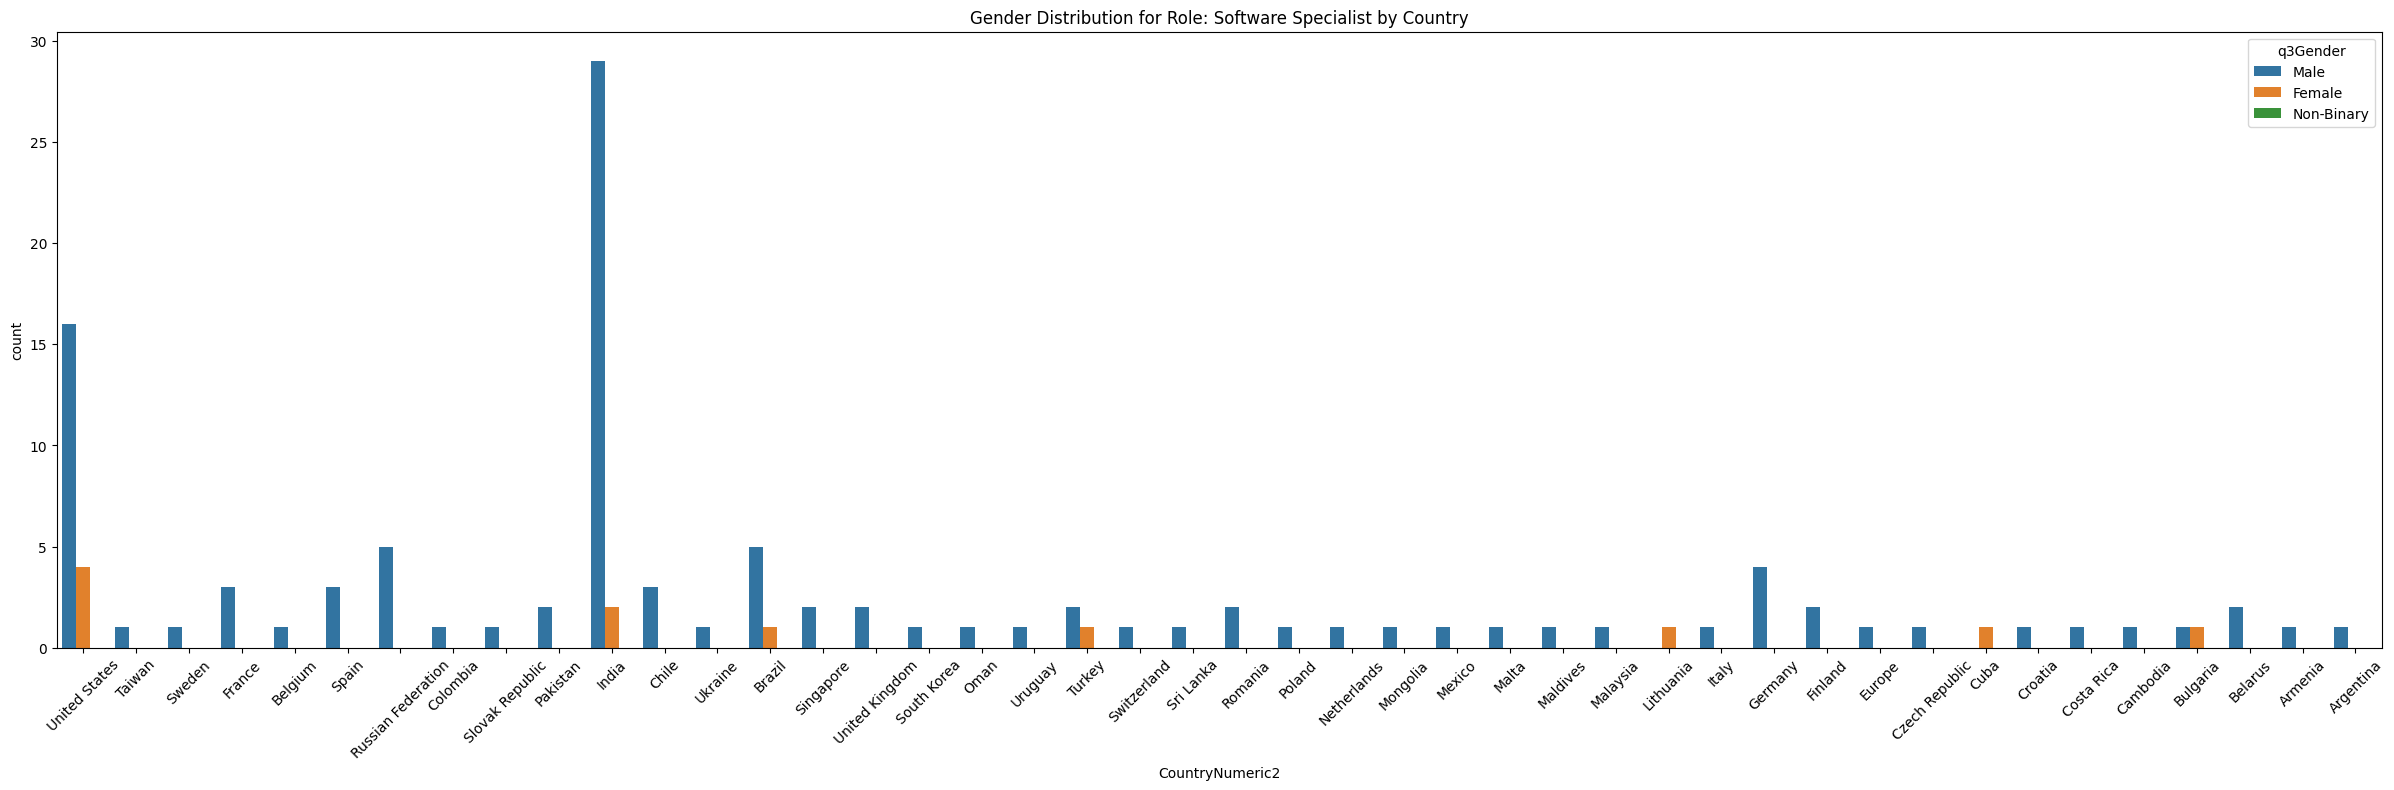

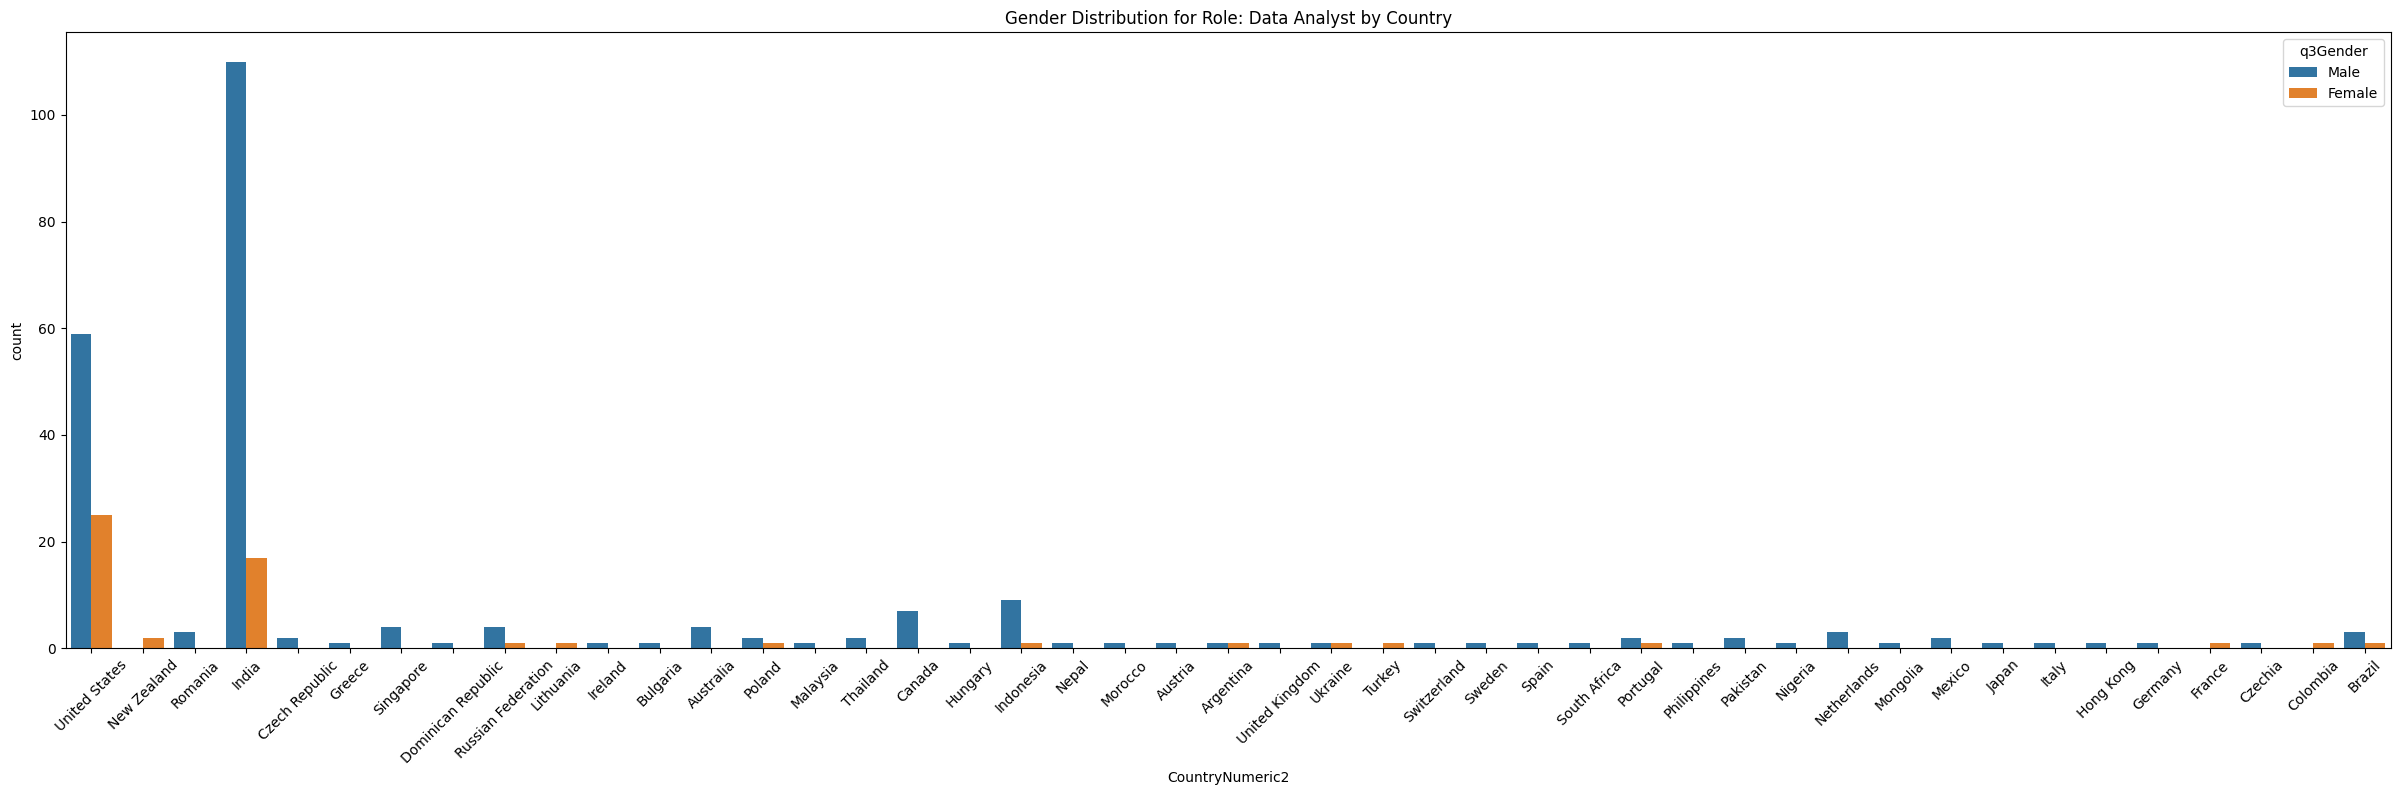

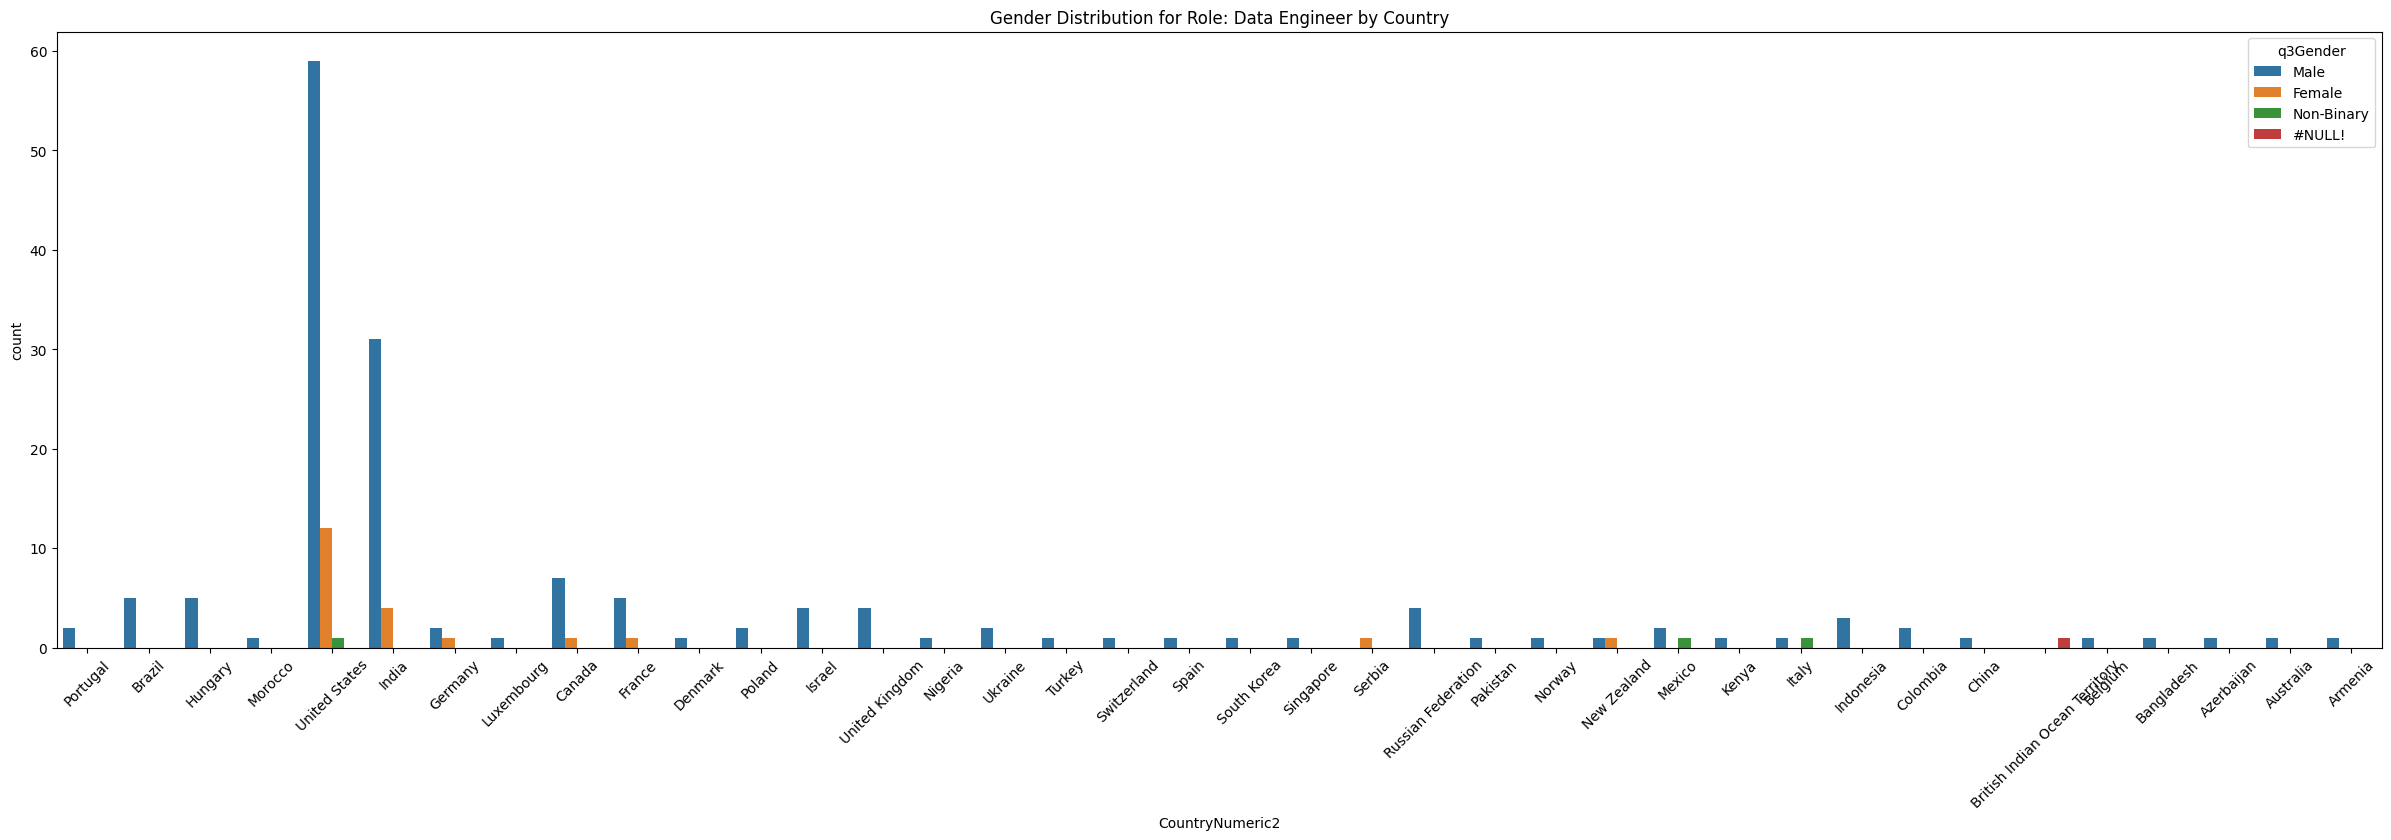

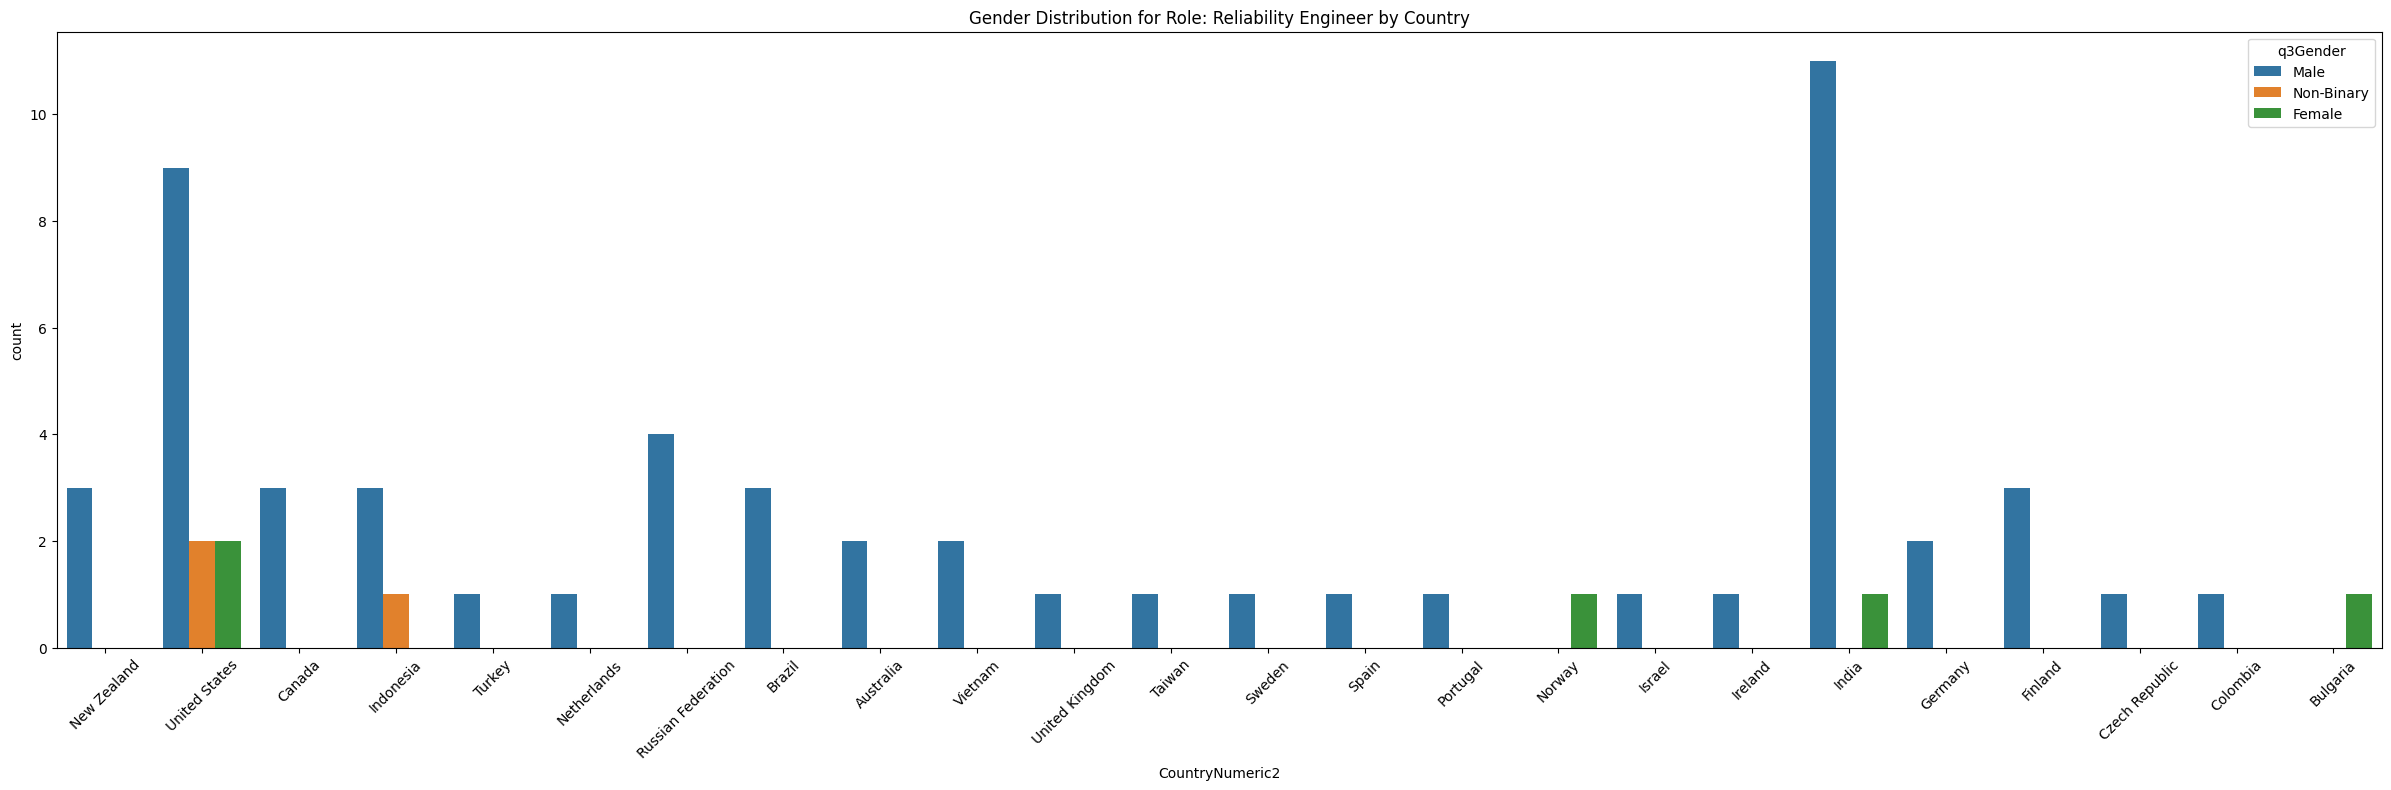

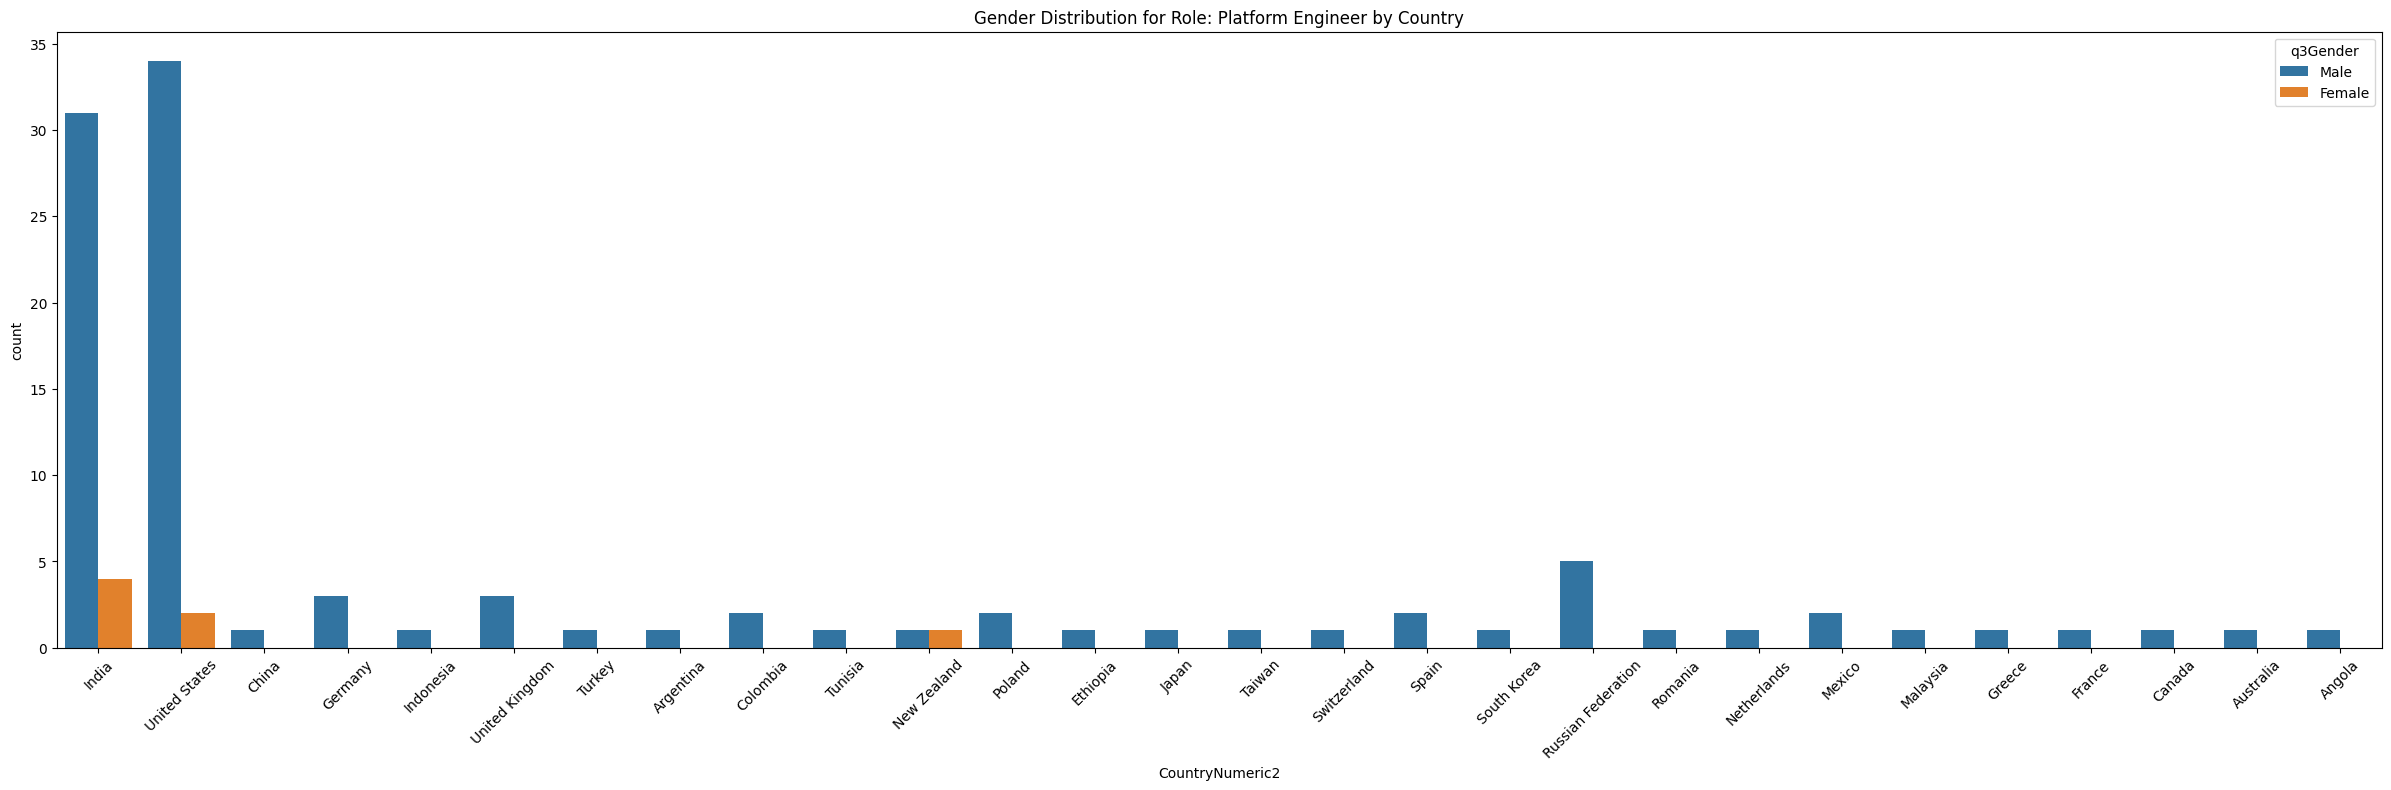

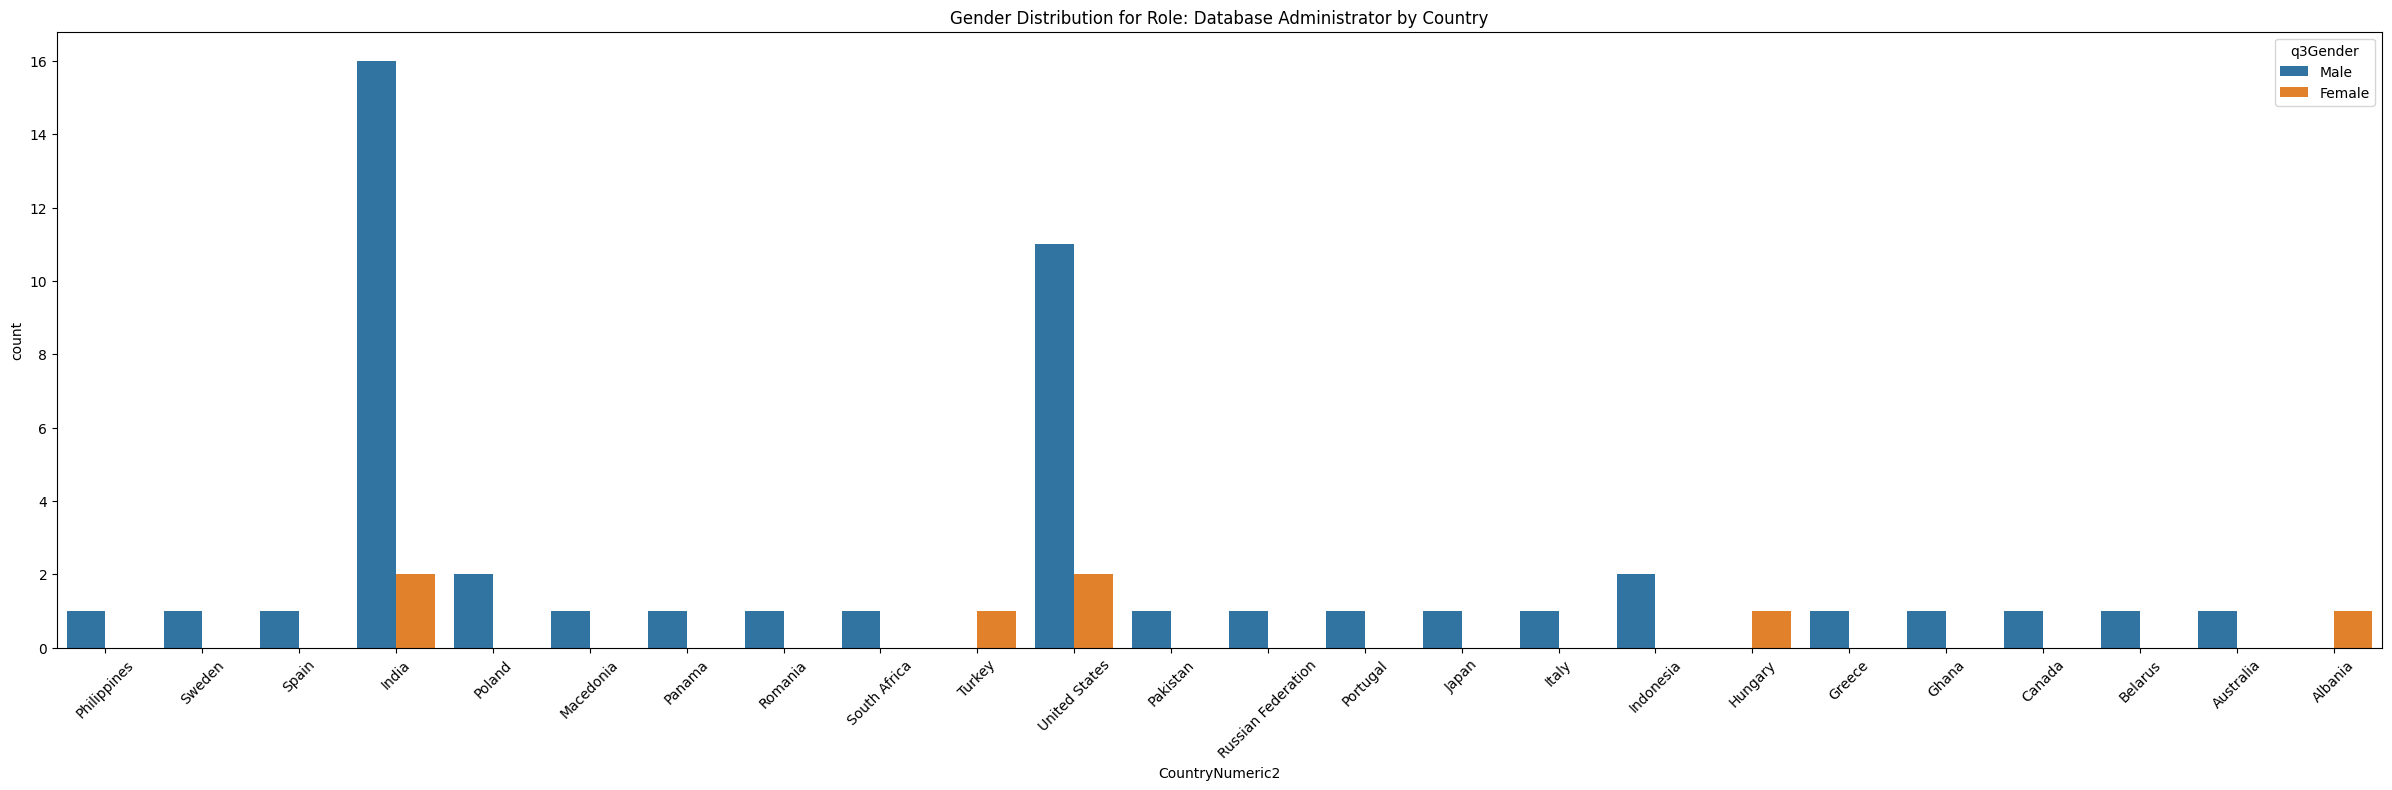

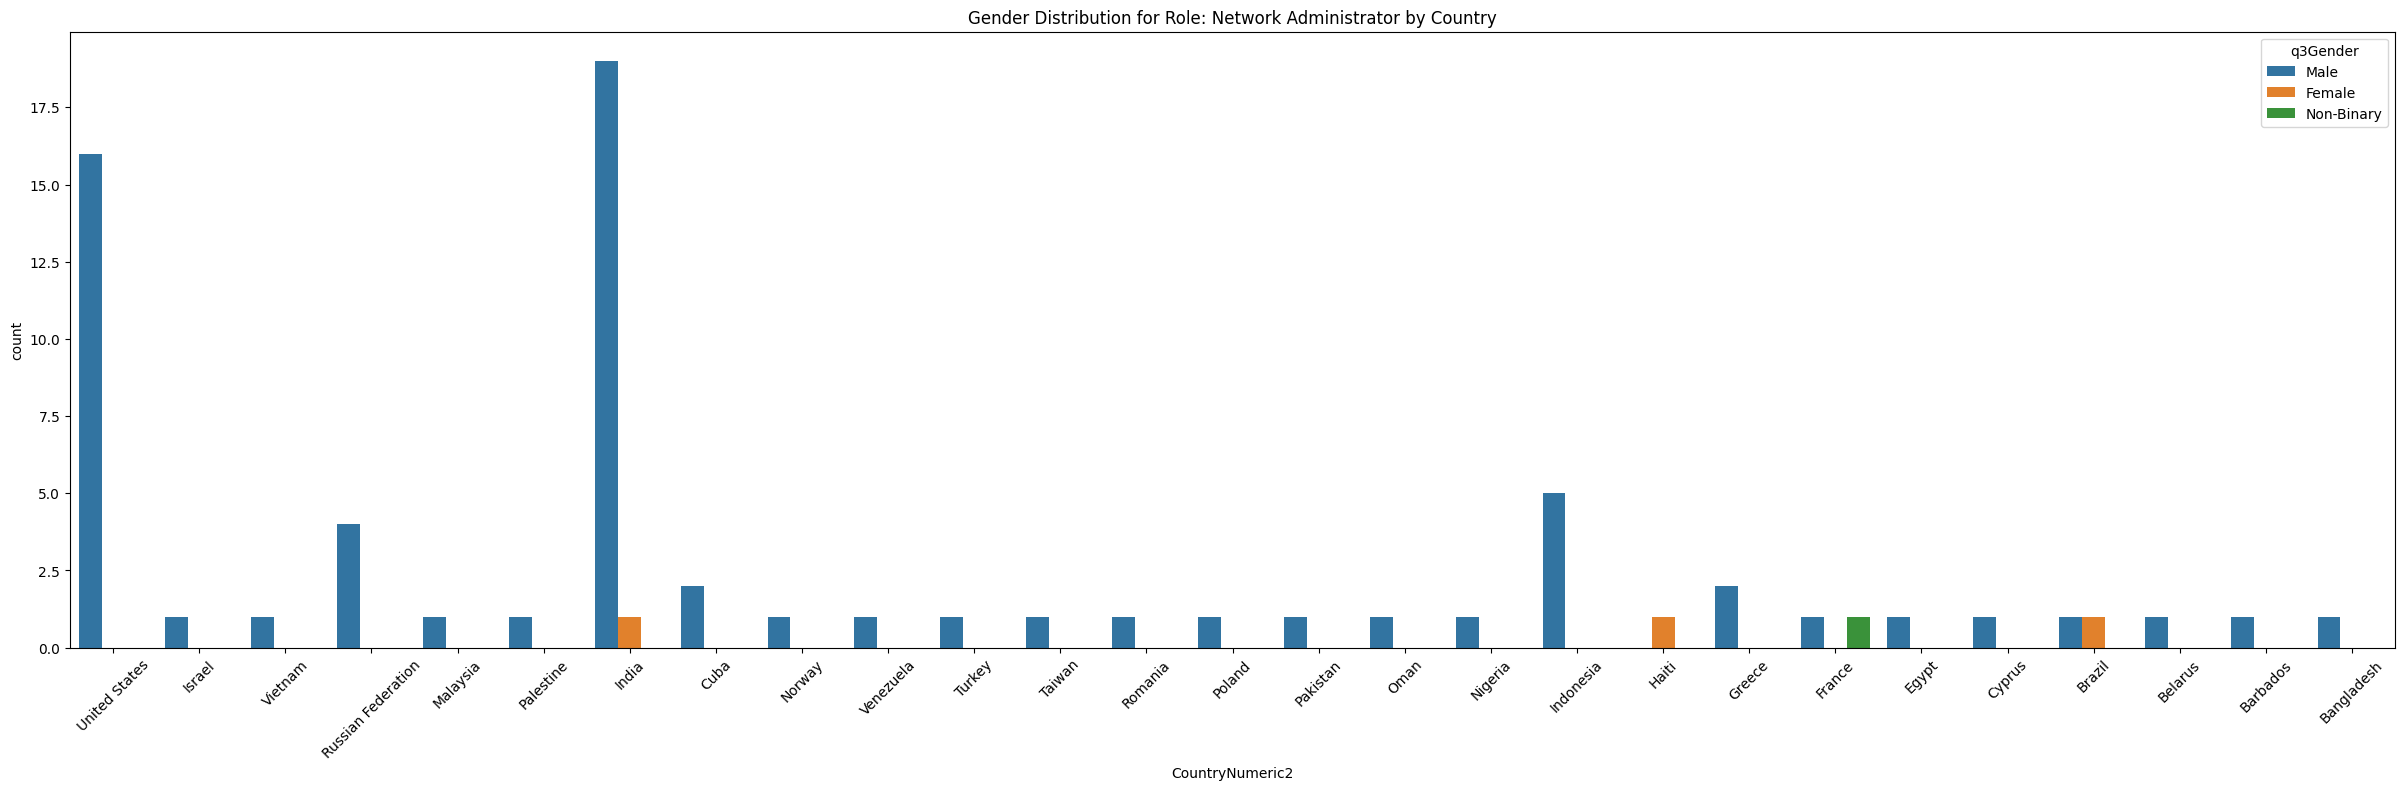

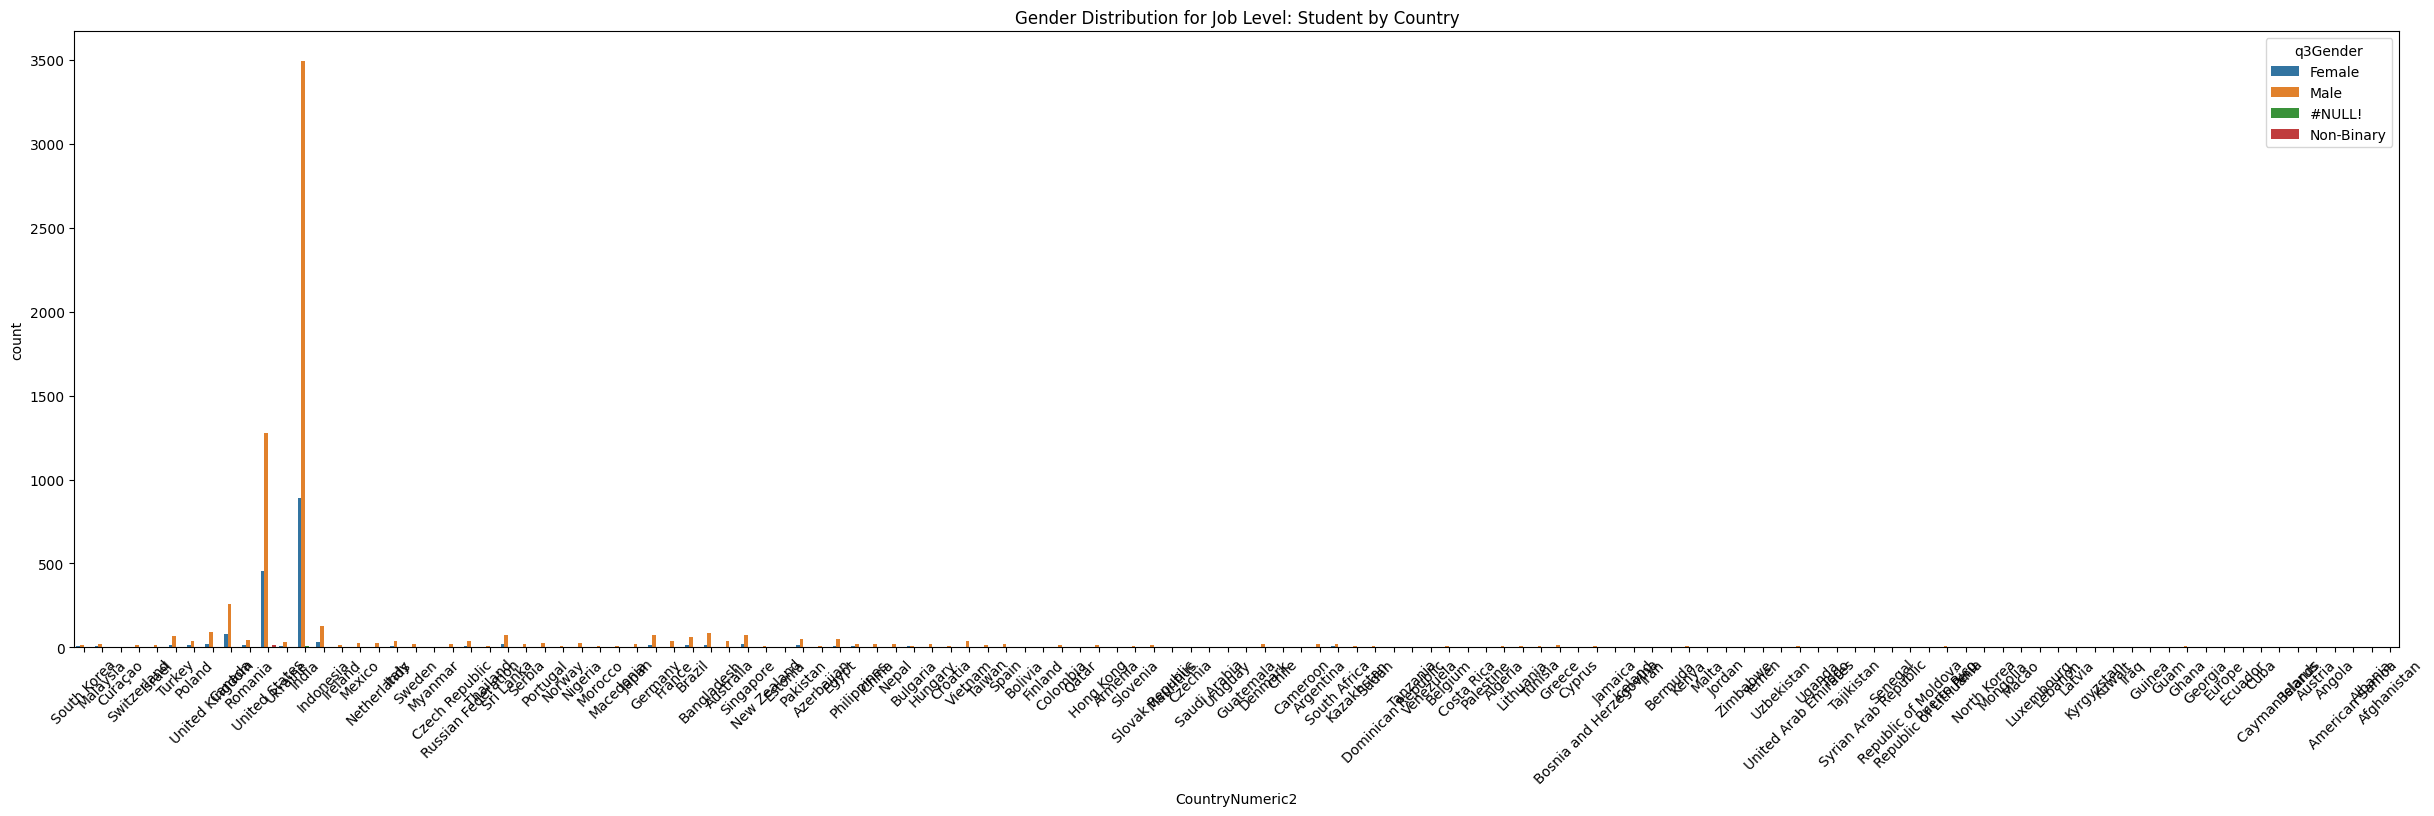

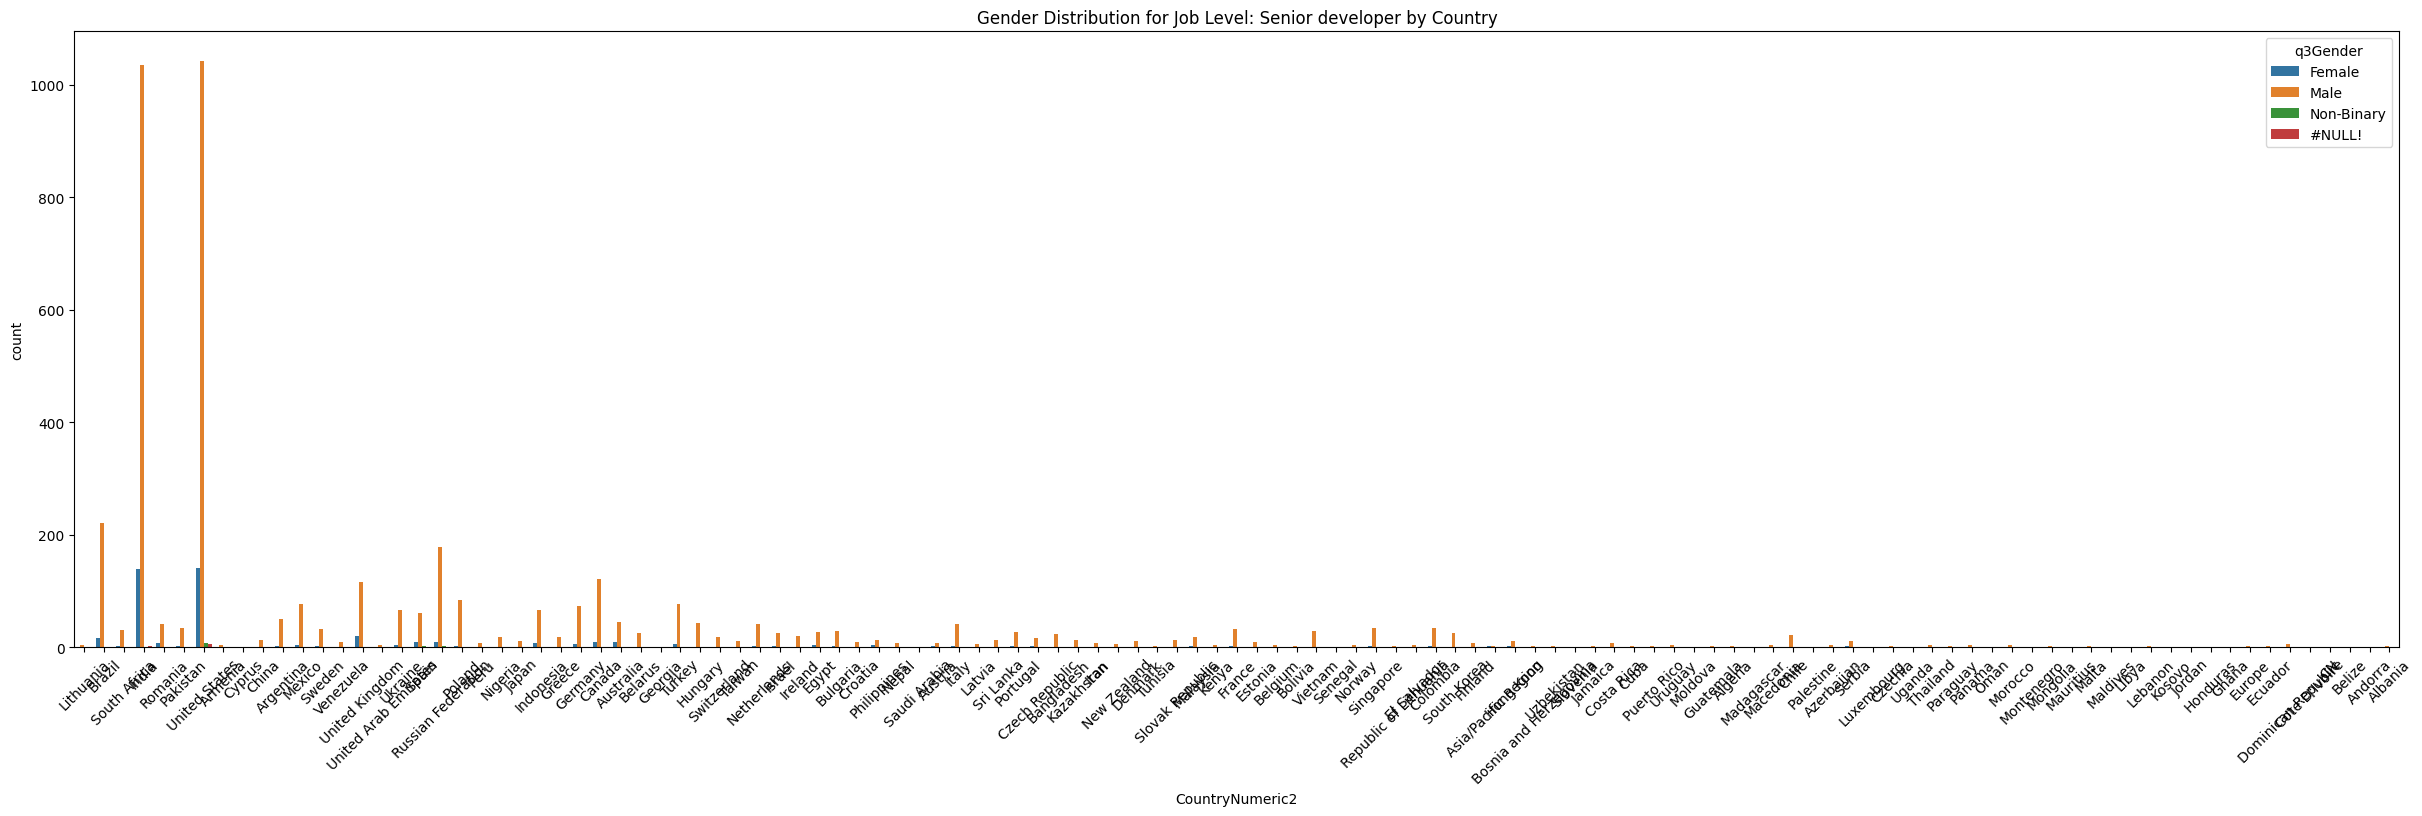

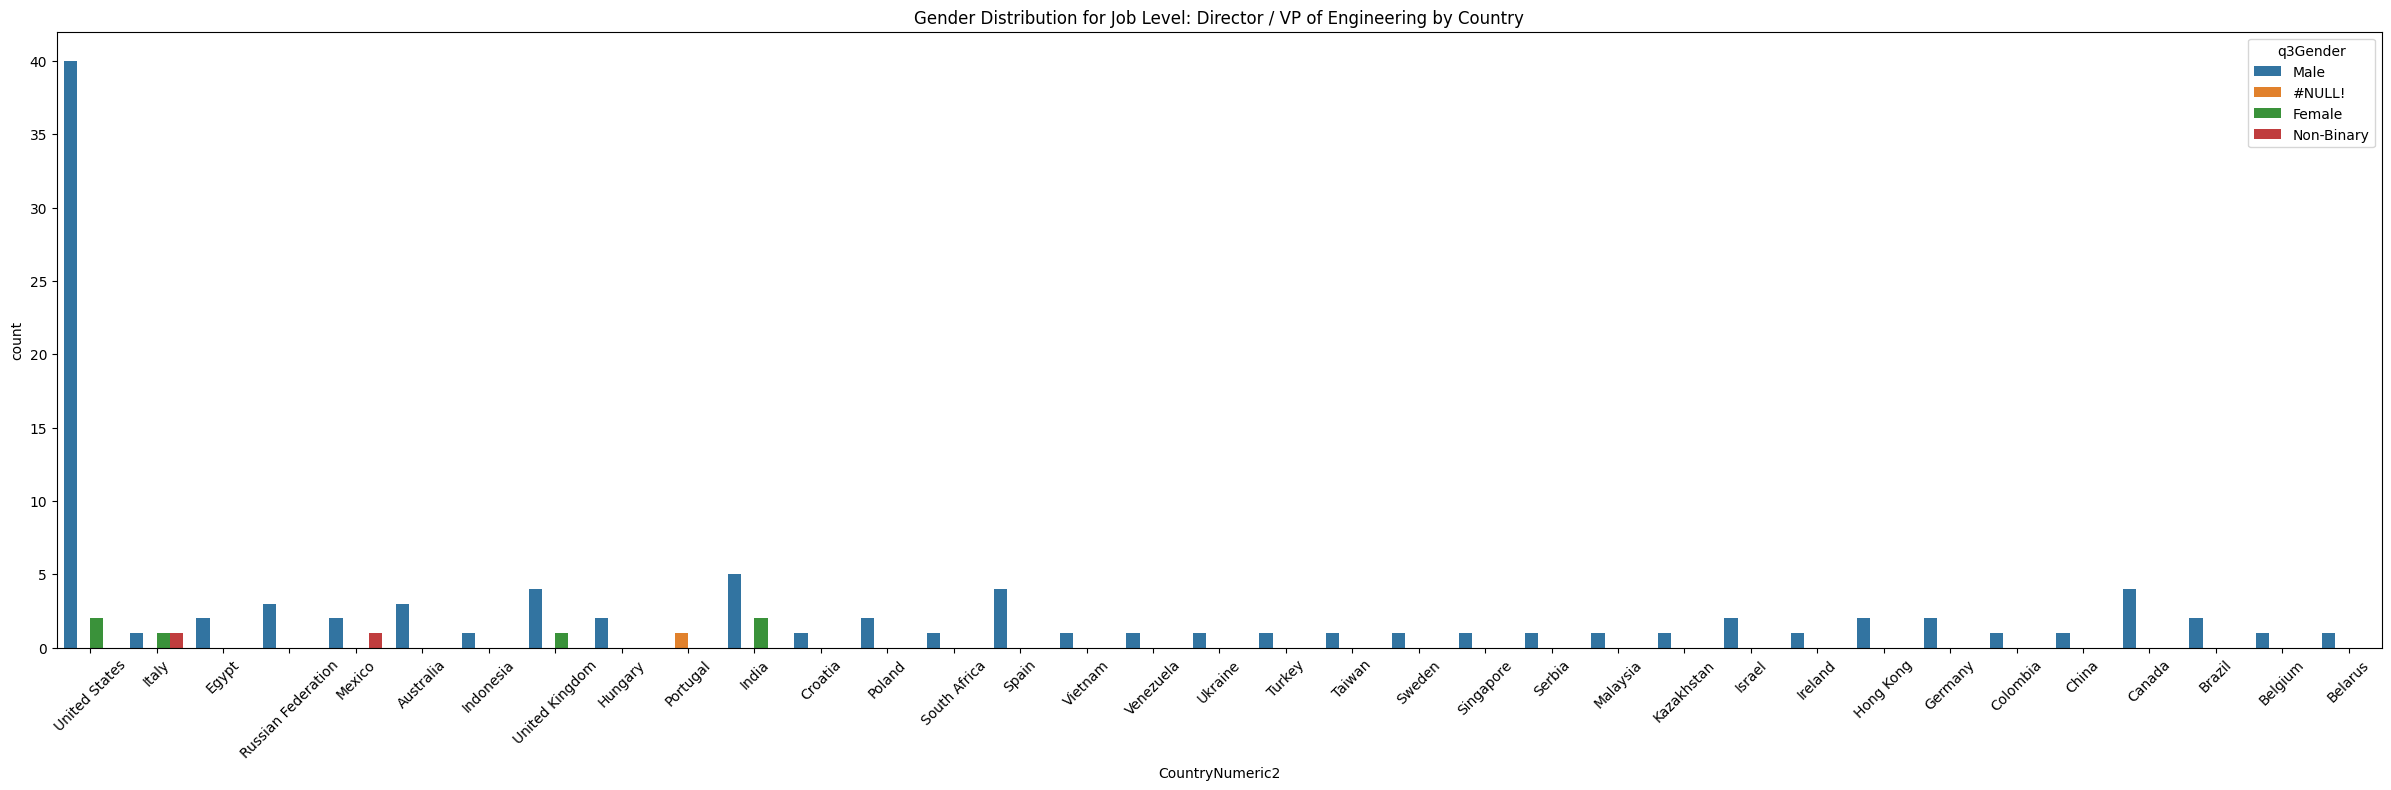

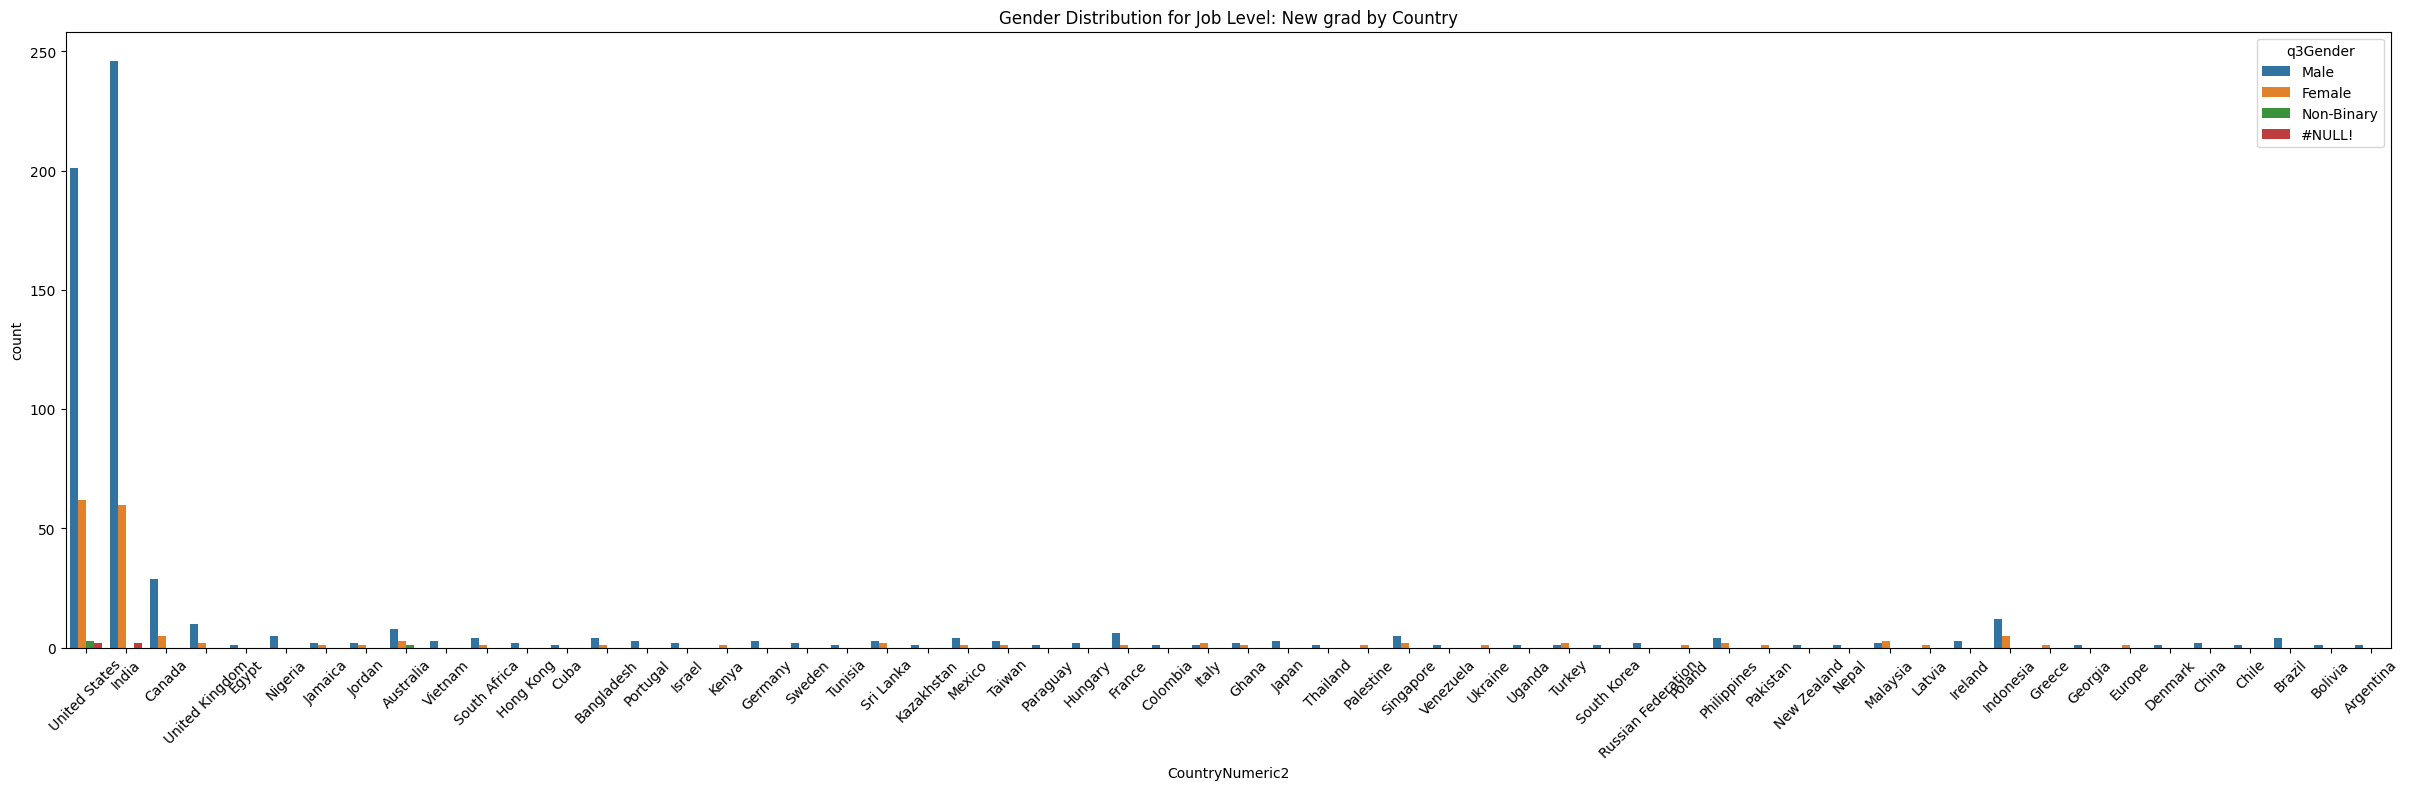

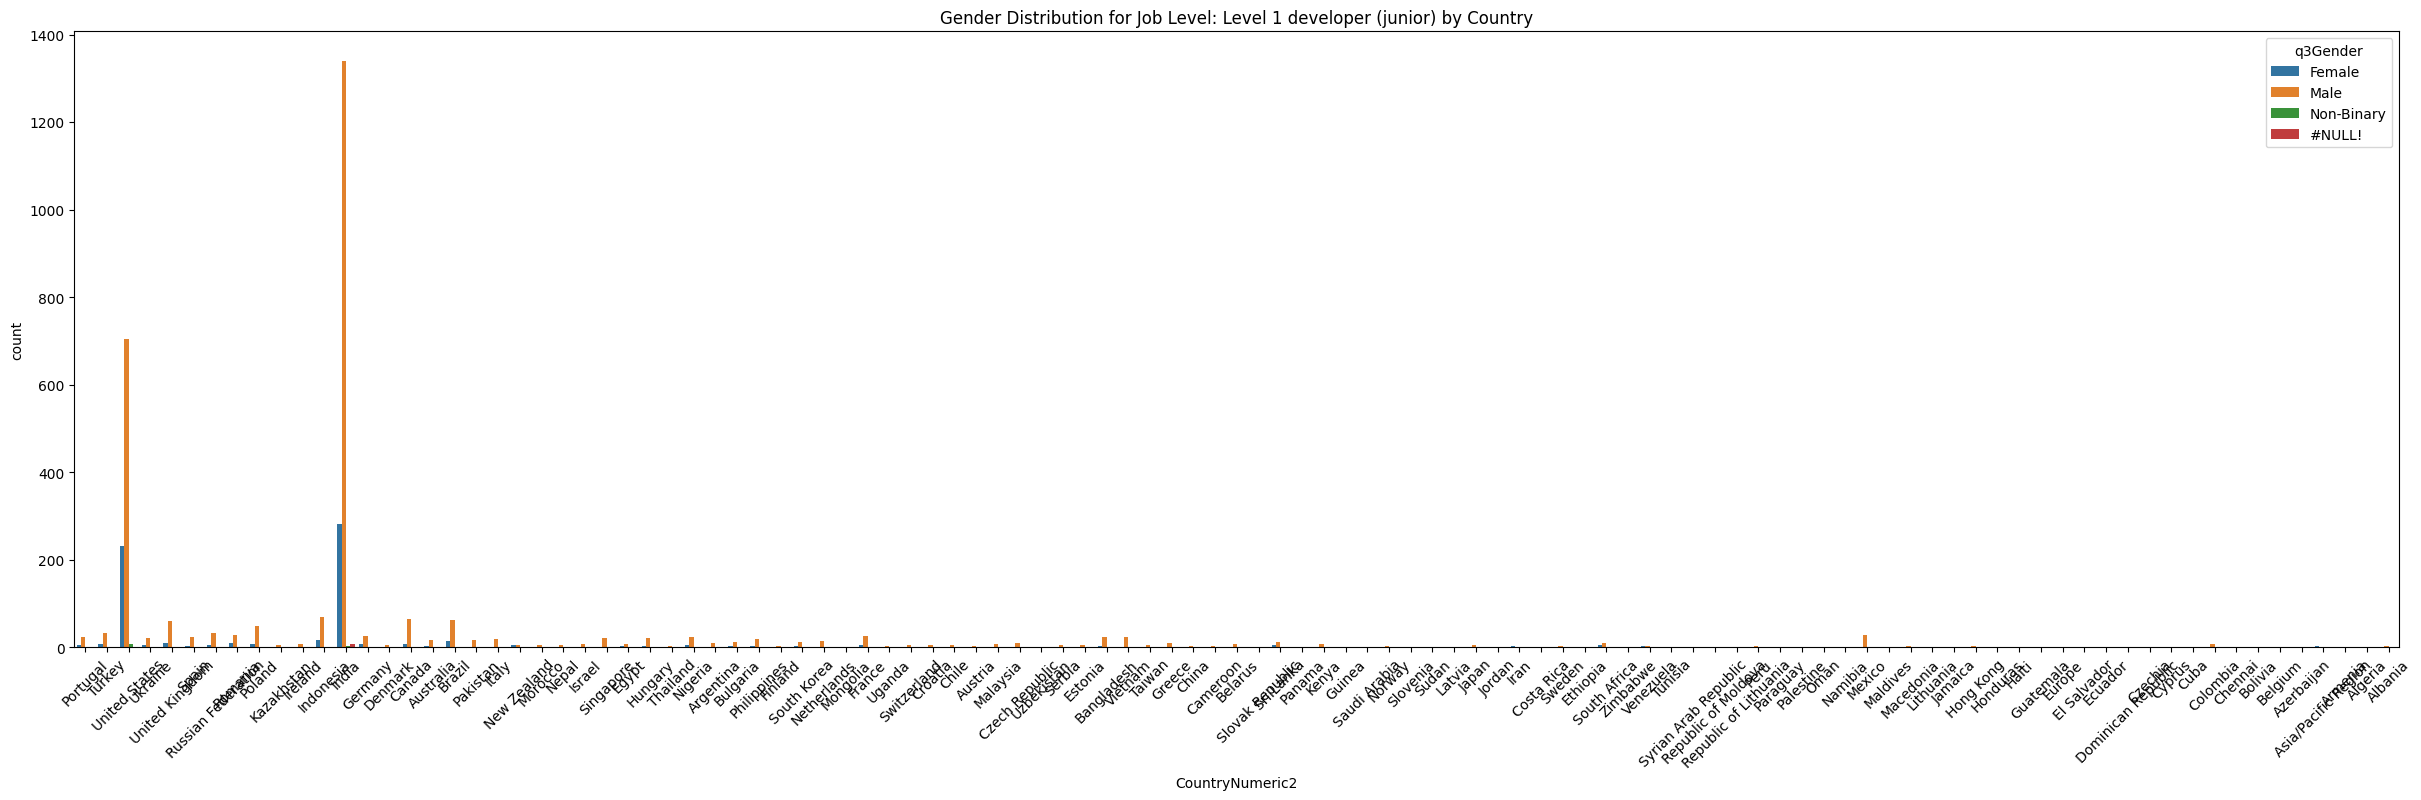

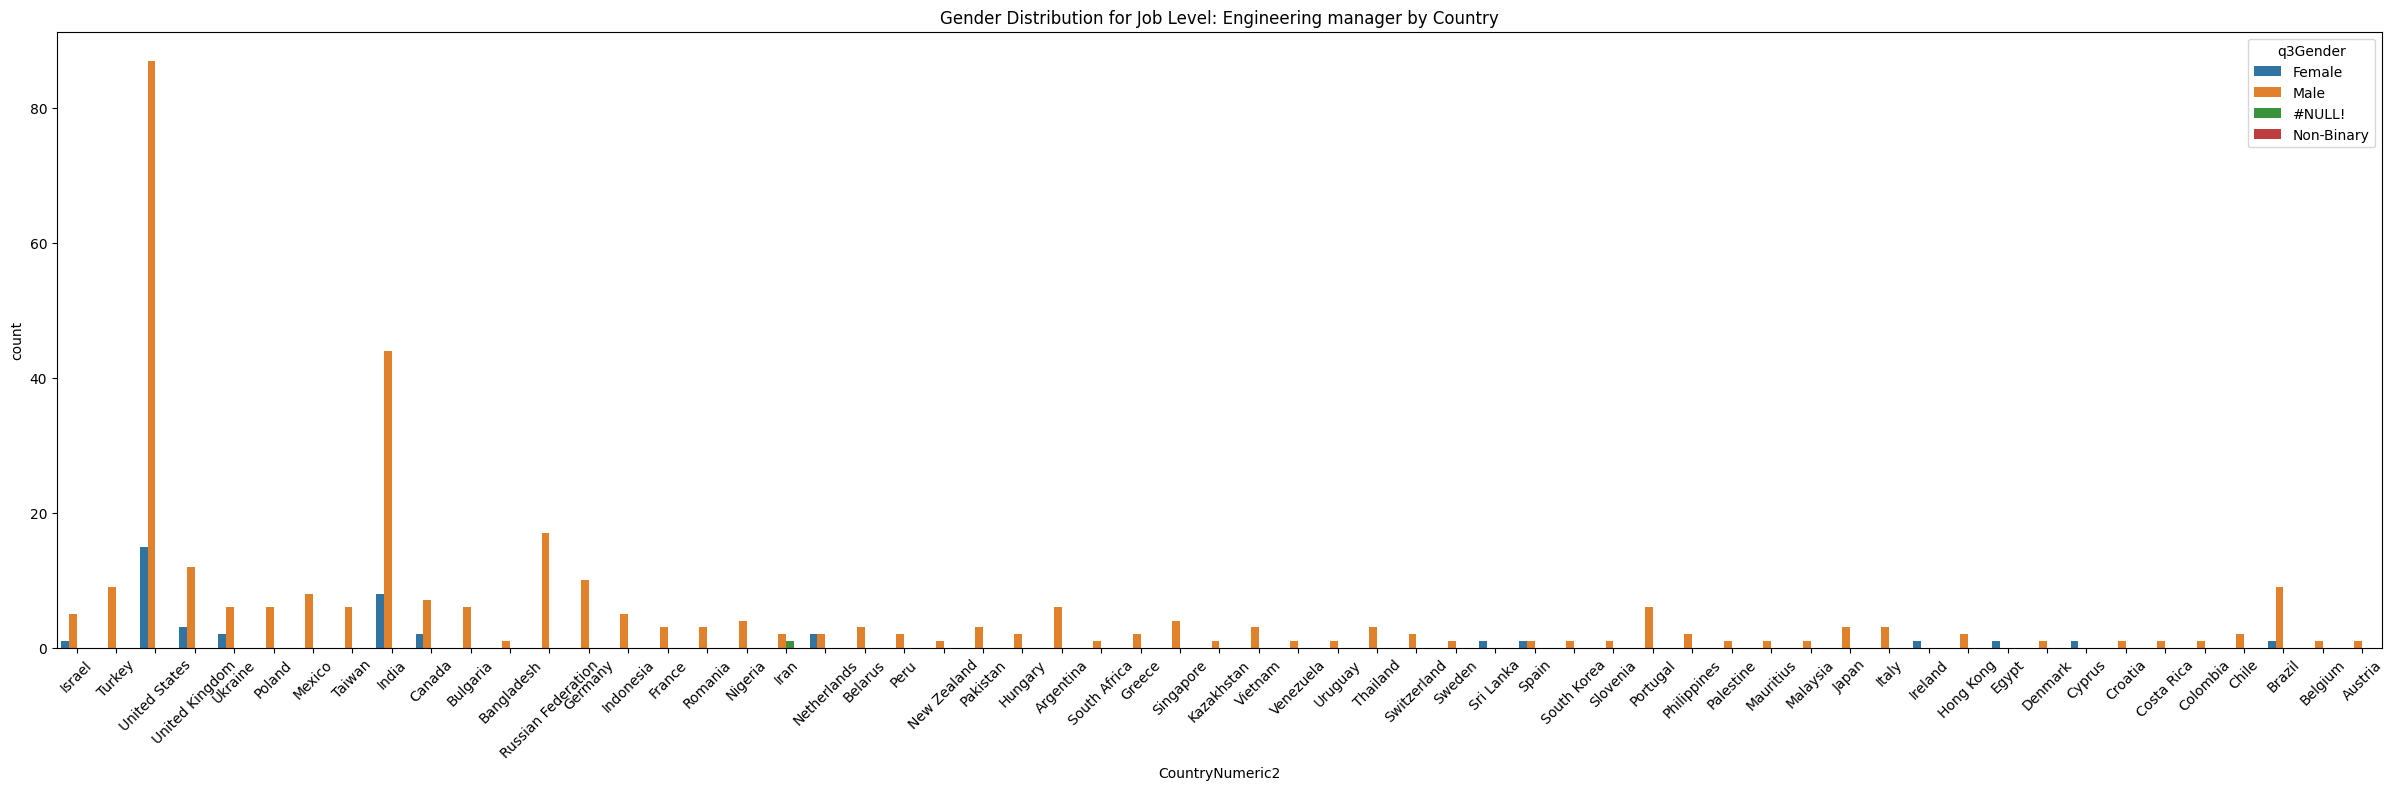

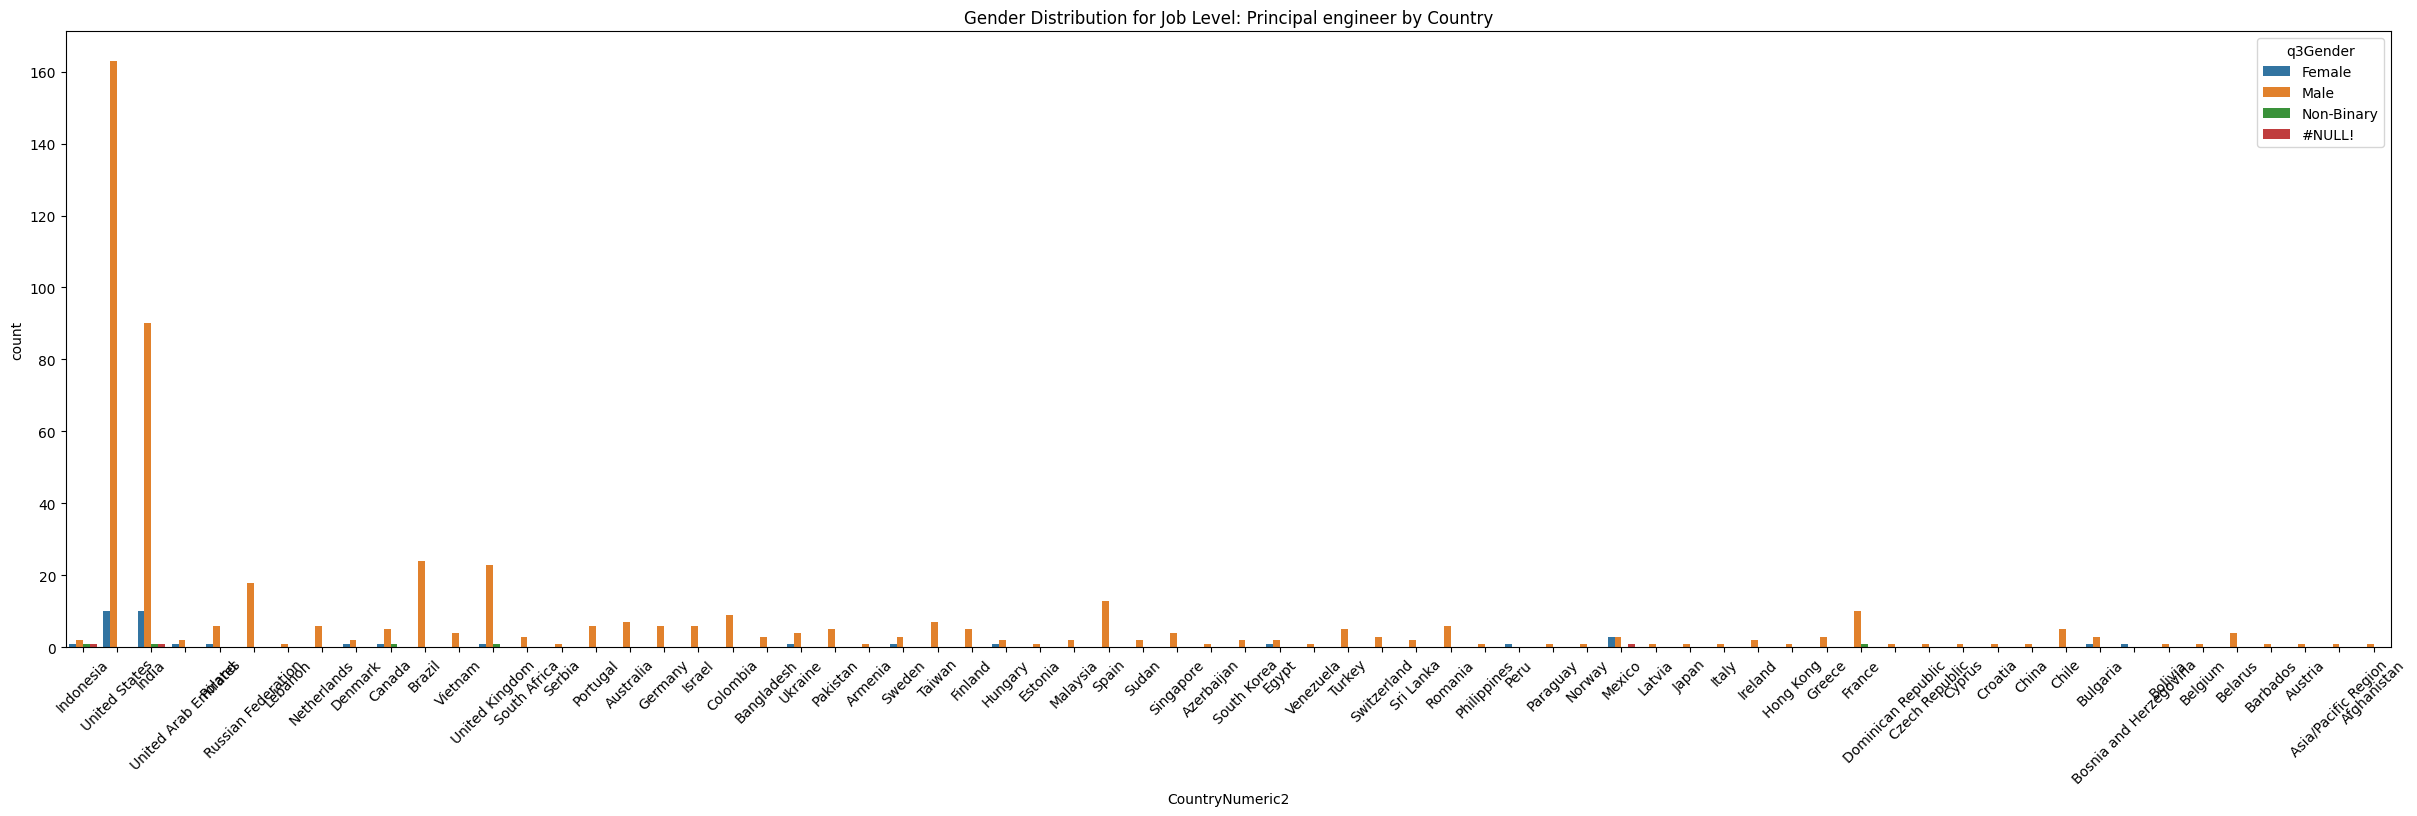

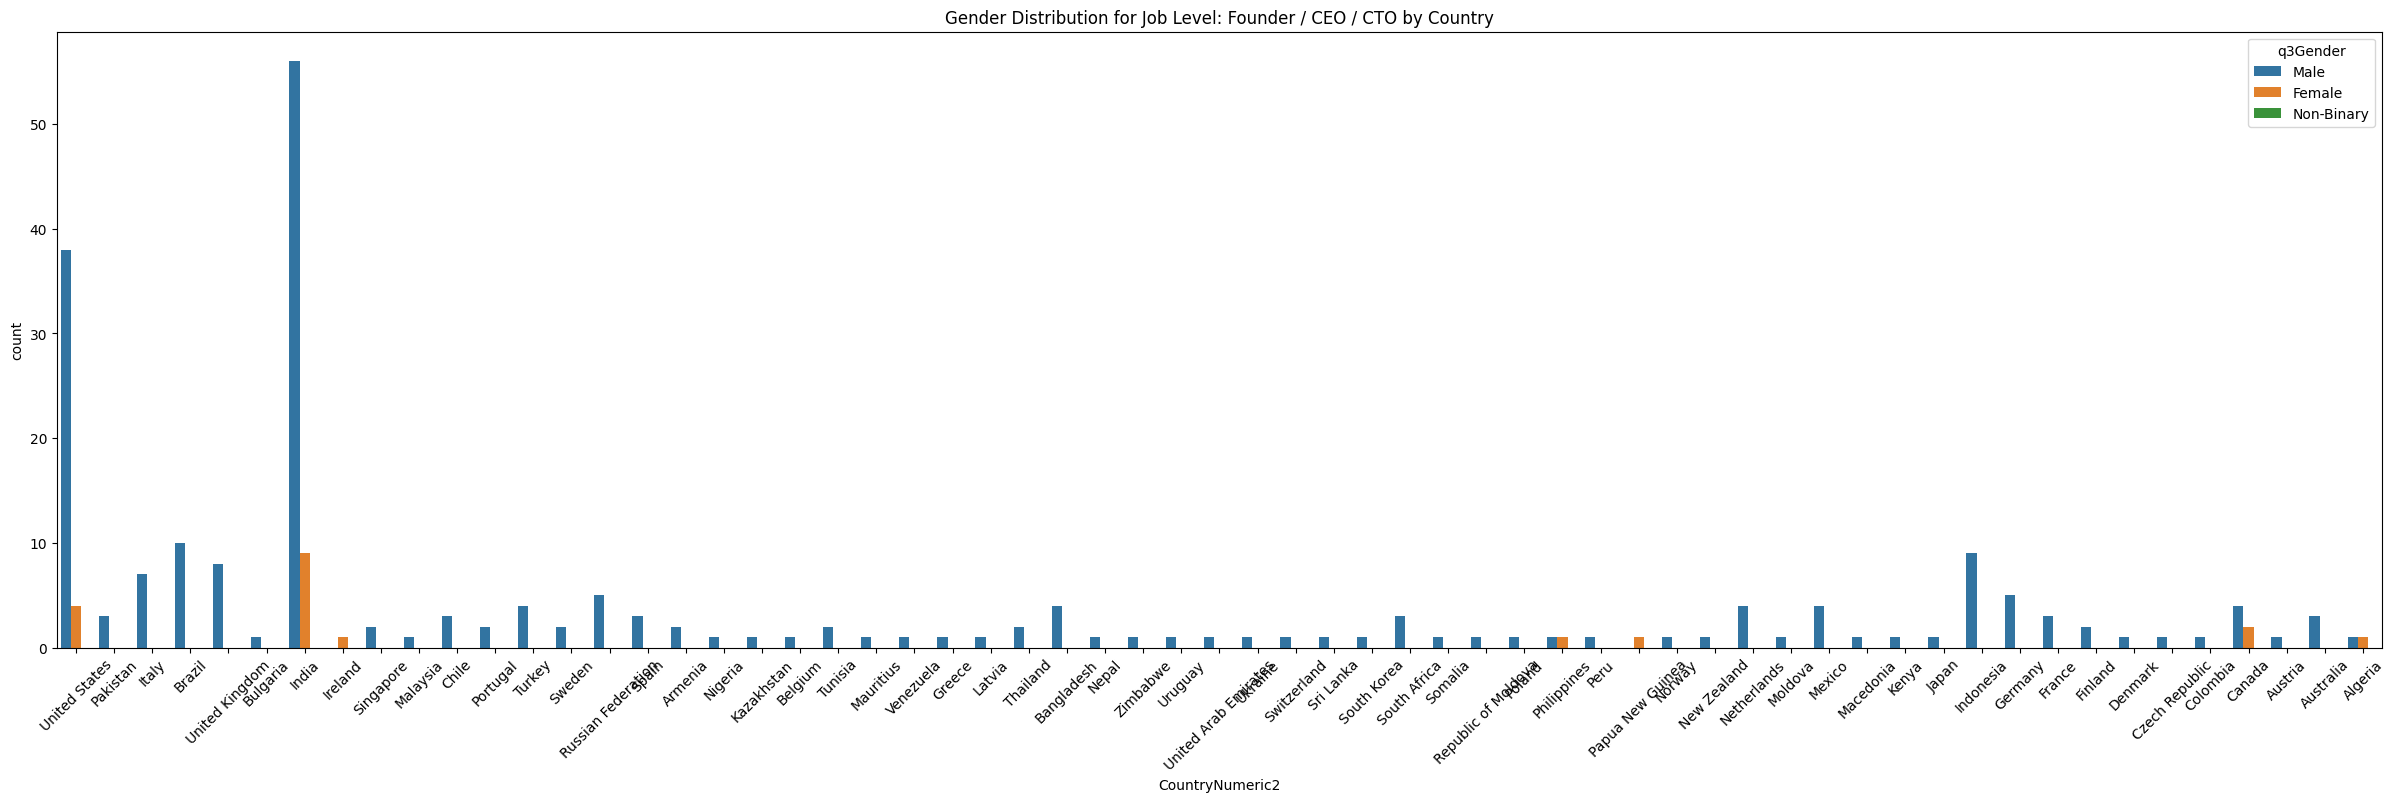

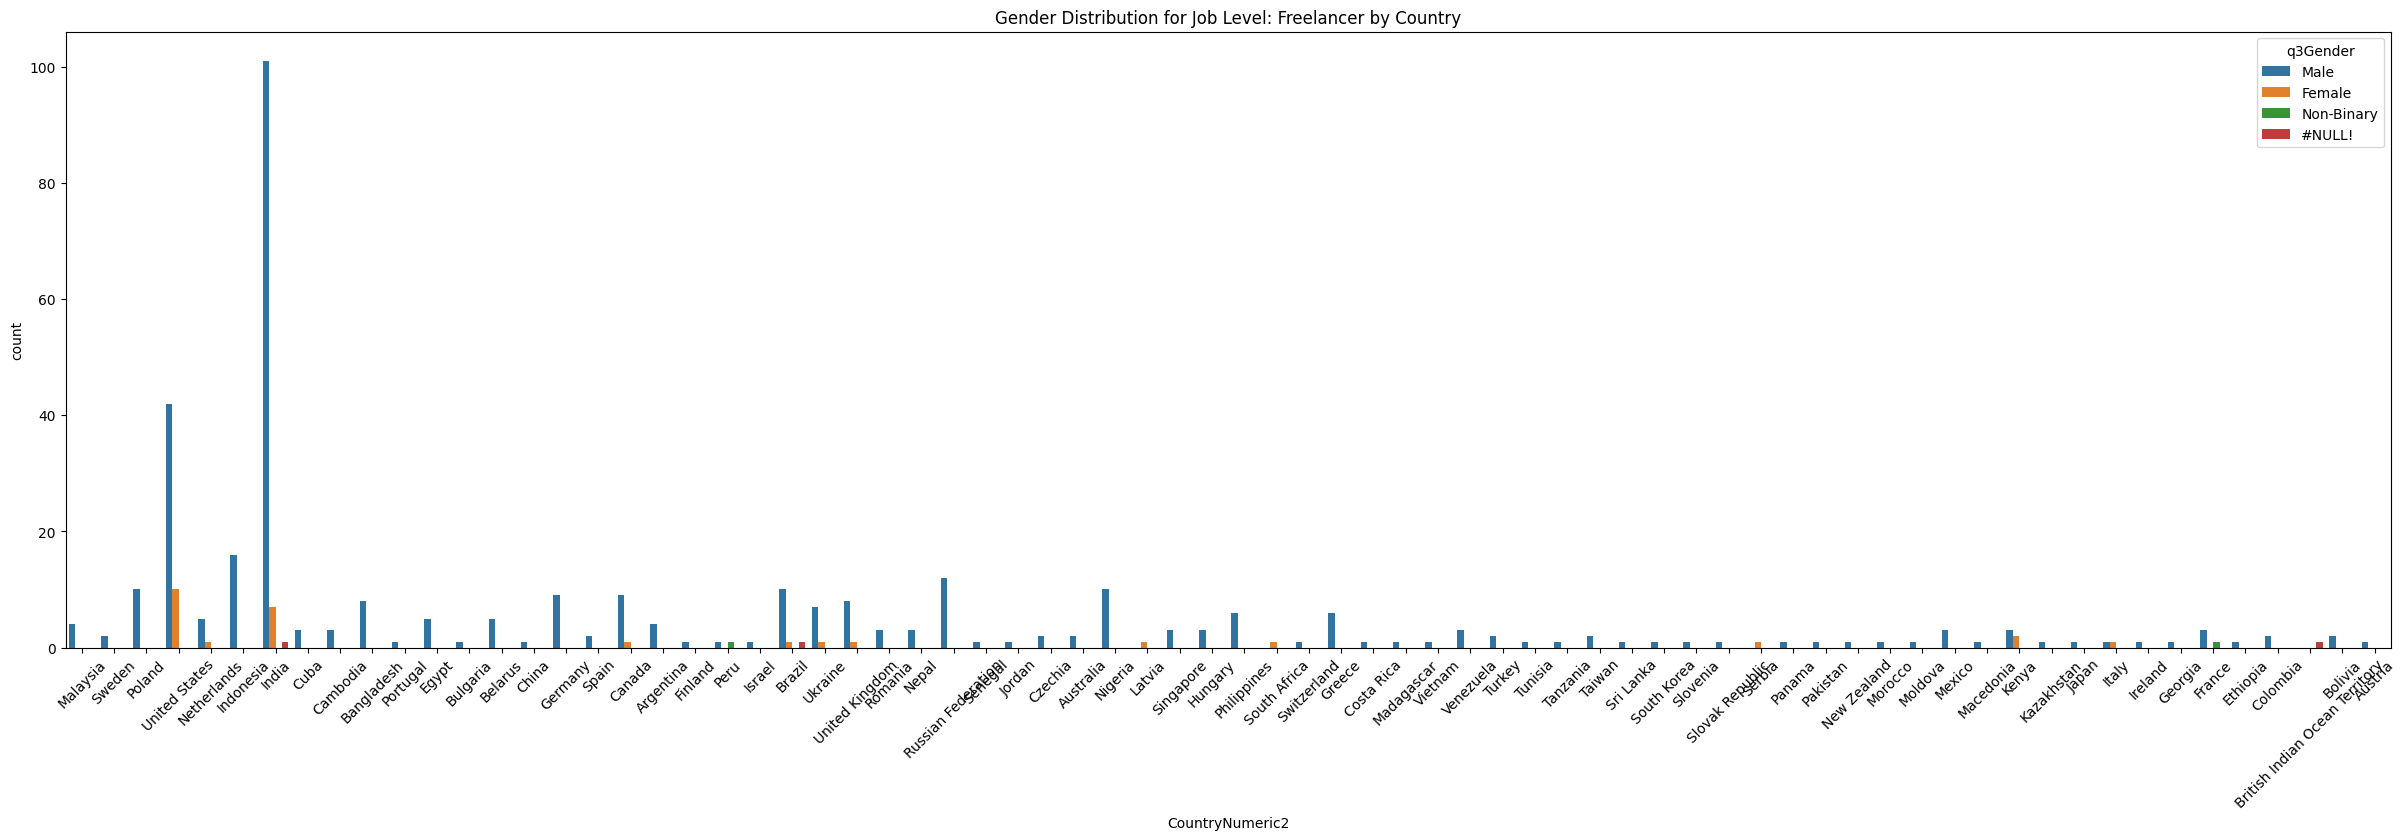

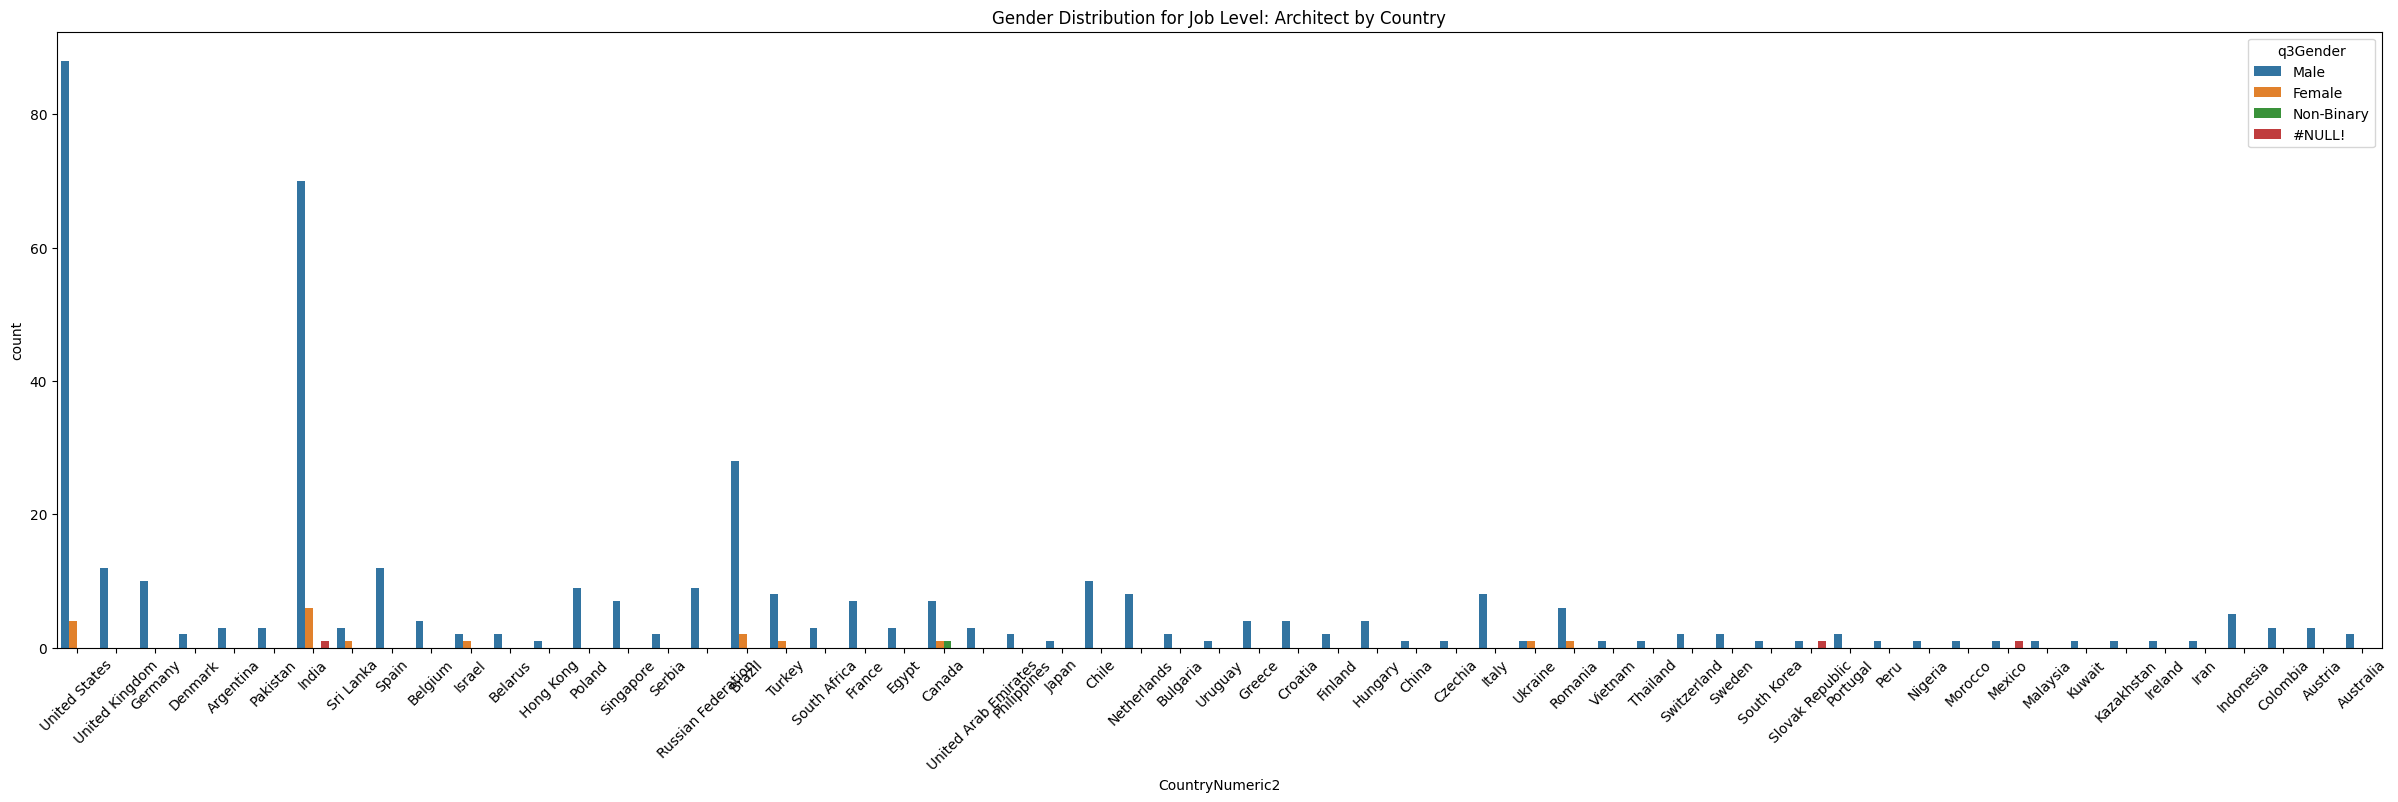

In [46]:
exec(clean_code)